<h1 style="text-align:center; font-size:38px; font-weight:bold;">
From Browsing to Buying: Machine Learning Insights into Online Shopper Engagement and Conversion Drivers
</h1>

## Environment Setup

- OS: macOS (Apple Silicon, M1/M2/M3)
- Python: 3.10
  
The following packages were used in this project:
- numpy == 1.23.5
- pandas == 1.5.3
- scikit-learn == 1.2.2
- scipy == 1.10.1
- matplotlib
- seaborn
- tensorflow-macos == 2.12
- scikeras == 0.12.0
- xgboost == 1.7.6
- ucimlrepo
- statsmodels

# Table of Contents
1. [Project Background and Objective](#1-project-background-and-objective)

2. [Data Understanding and Exploratory Data Analysis](#2-data-understanding-and-exploratory-data-analysis)

3. [Supervised Learning: Classification](#3-supervised-learningclassification)

4. [Supervised Learning: Regression](#4-supervised-learningregression)

5. [Unsupervised Learning](#5-unsupervised-learning)
   
6. [Conclusion and Recommendation](#6-conclusion-and-recommendation)

# 1. Project Background and Objective
With the rapid growth of e-commerce, understanding user browsing behavior and purchasing intent has become essential for improving marketing efficiency and increasing customer conversion rates. Although companies invest heavily in digital platforms, marketing strategies often remain inefficient without a clear understanding of how users interact with a website. Data-driven behavioral analysis provides a systematic way to uncover hidden engagement patterns and optimize targeting decisions.

In this project, we analyze a large real-world dataset of **online shopper sessions** and apply a combination of **exploratory data analysis**, **supervised learning**, **unsupervised learning**, and **visualization techniques** to understand both customer behavior and the factors influencing purchase decisions. Specifically, we aim to:
 - Explore the dataset to understand user engagement characteristics and behavioral distributions.
 - Build classification models to predict whether a user will make a purchase.
 - Use regression models to estimate PageValues, a metric measuring a page’s contribution to revenue.
 - Apply clustering methods to identify meaningful visitor segments based on browsing and engagement metrics.
 - Interpret feature importance across models to reveal the key behavioral signals that influence user intent.

Overall, the project seeks not only to build accurate predictive models, but also to generate practical, data-driven insights that can support more effective customer targeting strategies, improve user experience, and ultimately enhance conversion outcomes.


---

# 2. Data Understanding and Exploratory Data Analysis


## 2.1 Data Loading and Feature Overview
The dataset **Online Shoppers Intention** contains data from a real online store. Each record represents a visitor’s session during one year period, capturing the visitor’s behavior and engagement with the website. We load the dataset from [UCI repository](https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset).



In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load dataset directly from UCI repository (no manual download)
# If running for the first time, uncomment the following line:
# !pip install ucimlrepo

from ucimlrepo import fetch_ucirepo 
  
# Fetch the Online Shoppers Purchasing Intention Dataset (ID: 468)
dataset = fetch_ucirepo(id=468)

# Combine features and target into a single DataFrame
df = pd.concat([dataset.data.features, dataset.data.targets], axis=1)
  
# Display basic information
print(f"Number of samples: {df.shape[0]}, Number of features: {df.shape[1]}")

# Quick preview
df.head()


Number of samples: 12330, Number of features: 18


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### **Brief Description of Features**

- **Administrative, Informational, ProductRelated** – Number of pages visited in each category  
- **Administrative_Duration, Informational_Duration, ProductRelated_Duration** – Total time spent on each type of page (in seconds)  
- **BounceRates** – Percentage of visits where the user left after viewing a single page  
- **ExitRates** – Probability of leaving the website from a given page  
- **PageValues** – Estimated value of pages based on their contribution to a purchase  
- **SpecialDay** – Proximity of the visit to a special day (value closer to 1 means closer to the date)  
- **OperatingSystems, Browser, Region, TrafficType** – Technical and geographic characteristics of the session  
- **VisitorType** – Identifies returning or new visitors  
- **Weekend** – Indicates if the visit occurred on a weekend (Boolean)  
- **Month** – Month of the visit  
- **Revenue** – Purchase outcome (True = Purchase, False = No purchase)  


## 2.2 Missing Value Analysis

We check the dataset for missing values to ensure completeness and reliability before conducting further analysis.

In [2]:
# Check for missing values
missing = df.isnull().sum()
print("Missing values per column:\n", missing)

# Verify if any missing values exist
print("\nTotal missing values:", df.isnull().sum().sum())

Missing values per column:
 Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Total missing values: 0


The dataset contains **no missing values**, meaning all features are complete and ready for further analysis without additional imputation.

## 2.3 Exploratory Data Analysis with Visualization

The dataset contains 17 features describing online shopping sessions and 1 target (Revenue).
Features fall into three groups:
- **Behavioral features** - page visit counts and time spent:
Administrative, Informational, ProductRelated,
Administrative_Duration, Informational_Duration, ProductRelated_Duration
- **Engagement and quality metrics** – interaction intensity and conversion signals:
BounceRates, ExitRates, PageValues, SpecialDay
- **Visitor and context features** – user type, timing, and technical context:
OperatingSystems, Browser, Region, TrafficType, VisitorType, Weekend, Month

### 2.3.1 Behavioral features
These features describe how visitors navigate and interact with different sections of the website. They include both the number of pages visited and the total time spent on administrative, informational, and product-related pages.

##### a. Distribution of page counts and durations 

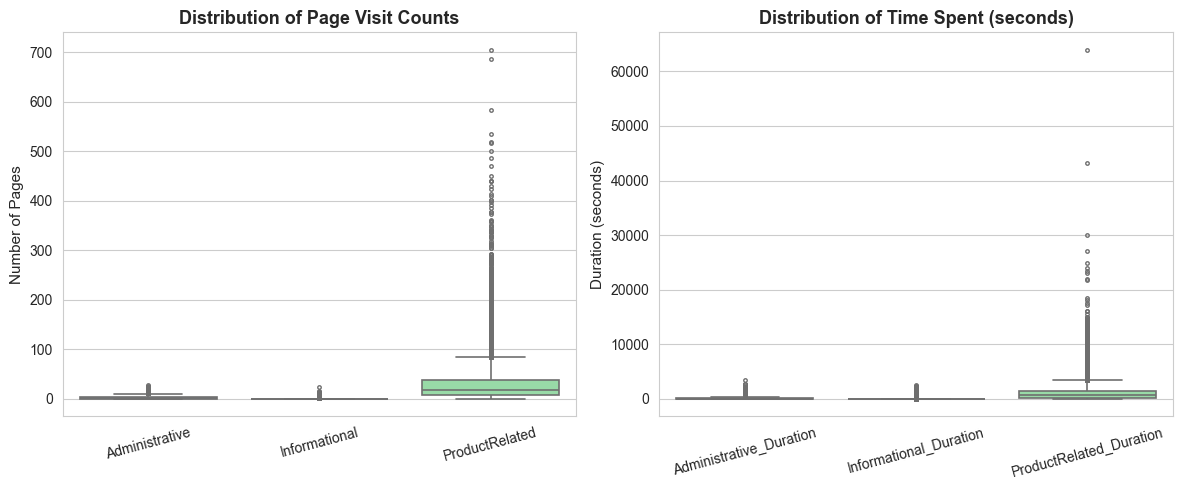

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
sns.set_palette("pastel")

fig, axes = plt.subplots(1, 2, figsize=(12,5))

# ----------------------------
# Left subplot: Page visit counts
# ----------------------------
sns.boxplot(
    data=df[['Administrative', 'Informational', 'ProductRelated']],
    ax=axes[0],
    linewidth=1.2,
    fliersize=2.5
)
axes[0].set_title('Distribution of Page Visit Counts', fontsize=13, fontweight='bold')
axes[0].set_xlabel('')
axes[0].set_ylabel('Number of Pages', fontsize=11)
axes[0].tick_params(axis='x', rotation=15)

# ----------------------------
# Right subplot: Time spent on page types
# ----------------------------
sns.boxplot(
    data=df[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']],
    ax=axes[1],
    linewidth=1.2,
    fliersize=2.5
)
axes[1].set_title('Distribution of Time Spent (seconds)', fontsize=13, fontweight='bold')
axes[1].set_xlabel('')
axes[1].set_ylabel('Duration (seconds)', fontsize=11)
axes[1].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

It can be found that visitors spend the most time and view the most pages under the product-related category, indicating that product browsing is the central activity of most sessions.

##### b. Relationship with Revenue 

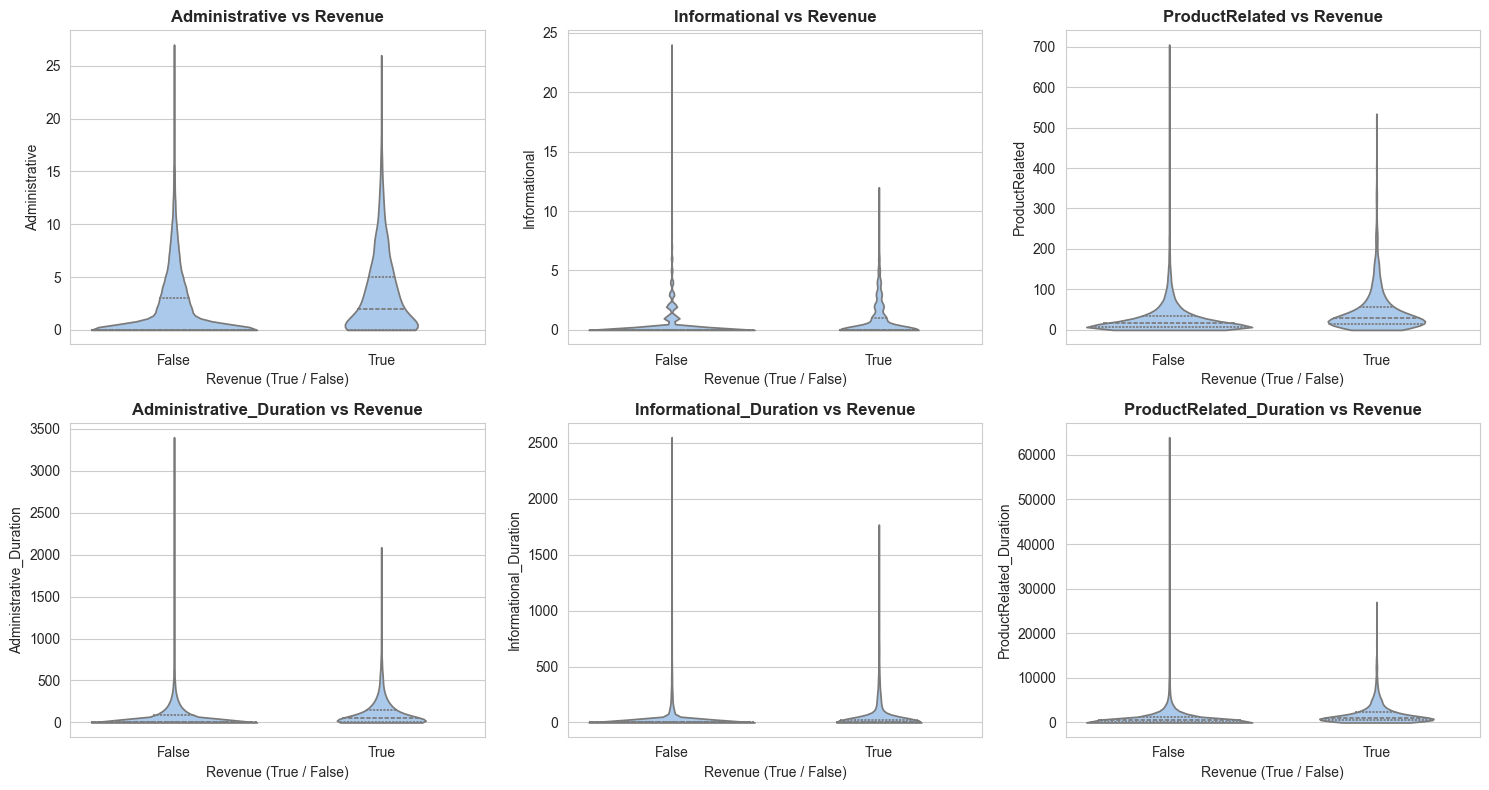

In [4]:
sns.set_style("whitegrid")
sns.set_palette("pastel")

fig, axes = plt.subplots(2, 3, figsize=(15,8))

cols = [
    'Administrative', 'Informational', 'ProductRelated',
    'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration'
]

for i, col in enumerate(cols):
    r, c = divmod(i, 3)
    sns.violinplot(x='Revenue', y=col, data=df, ax=axes[r,c], inner='quartile', cut=0)
    axes[r,c].set_title(f'{col} vs Revenue', fontsize=12, fontweight='bold')
    axes[r,c].set_xlabel('Revenue (True / False)')
    axes[r,c].set_ylabel(col)

plt.tight_layout()
plt.show()

It can be found that sessions ending with purchases generally show higher page counts and longer durations across all categories, particularly for ProductRelated and its duration, showing that deeper product interaction increases purchase likelihood.

### 2.3.2 Engagement & quality metrics
These features capture the intensity and quality of user interactions with the website, reflecting how engaged visitors are and how likely they are to convert into customers.

#####  a. Distribution of Engagement and Quality Metrics

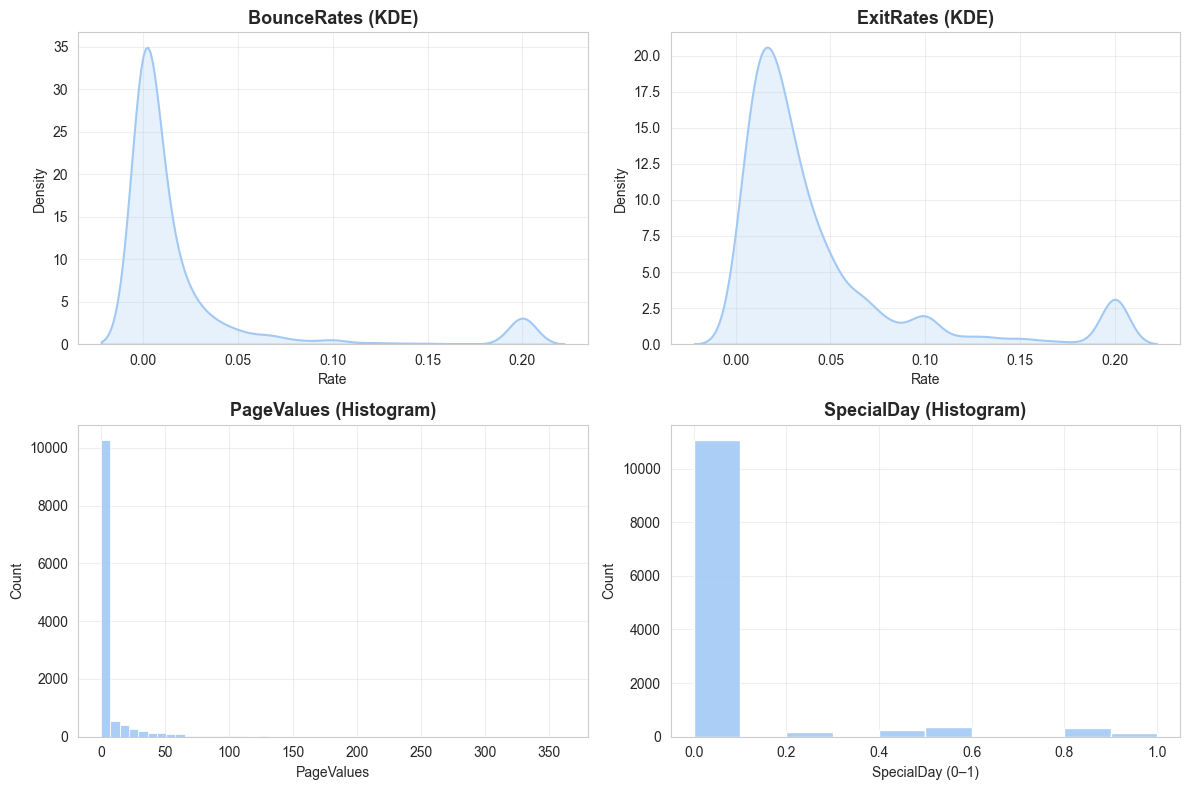

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
sns.set_palette("pastel")

fig, axes = plt.subplots(2, 2, figsize=(12,8))

# (1) BounceRates 
sns.kdeplot(df['BounceRates'], fill=True, ax=axes[0,0], linewidth=1.5)
axes[0,0].set_title('BounceRates (KDE)', fontsize=13, fontweight='bold')
axes[0,0].set_xlabel('Rate'); axes[0,0].set_ylabel('Density')
axes[0,0].grid(alpha=0.3)

# (2) ExitRates 
sns.kdeplot(df['ExitRates'], fill=True, ax=axes[0,1], linewidth=1.5)
axes[0,1].set_title('ExitRates (KDE)', fontsize=13, fontweight='bold')
axes[0,1].set_xlabel('Rate'); axes[0,1].set_ylabel('Density')
axes[0,1].grid(alpha=0.3)

# (3) PageValues 
sns.histplot(df['PageValues'], bins=50, ax=axes[1,0], edgecolor=None, alpha=0.9)
axes[1,0].set_title('PageValues (Histogram)', fontsize=13, fontweight='bold')
axes[1,0].set_xlabel('PageValues'); axes[1,0].set_ylabel('Count')
axes[1,0].grid(alpha=0.3)

# (4) SpecialDay 
sns.histplot(df['SpecialDay'], bins=10, ax=axes[1,1], edgecolor=None, alpha=0.9)
axes[1,1].set_title('SpecialDay (Histogram)', fontsize=13, fontweight='bold')
axes[1,1].set_xlabel('SpecialDay (0–1)'); axes[1,1].set_ylabel('Count')
axes[1,1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

It can be found that BounceRates and ExitRates are highly right-skewed, indicating most sessions end after few page views. PageValues also show a long-tailed distribution, where only a small fraction of visits generate high conversion value. SpecialDay remains mostly zero, suggesting few sessions occur near special events.


##### b. Relationship with Revenue

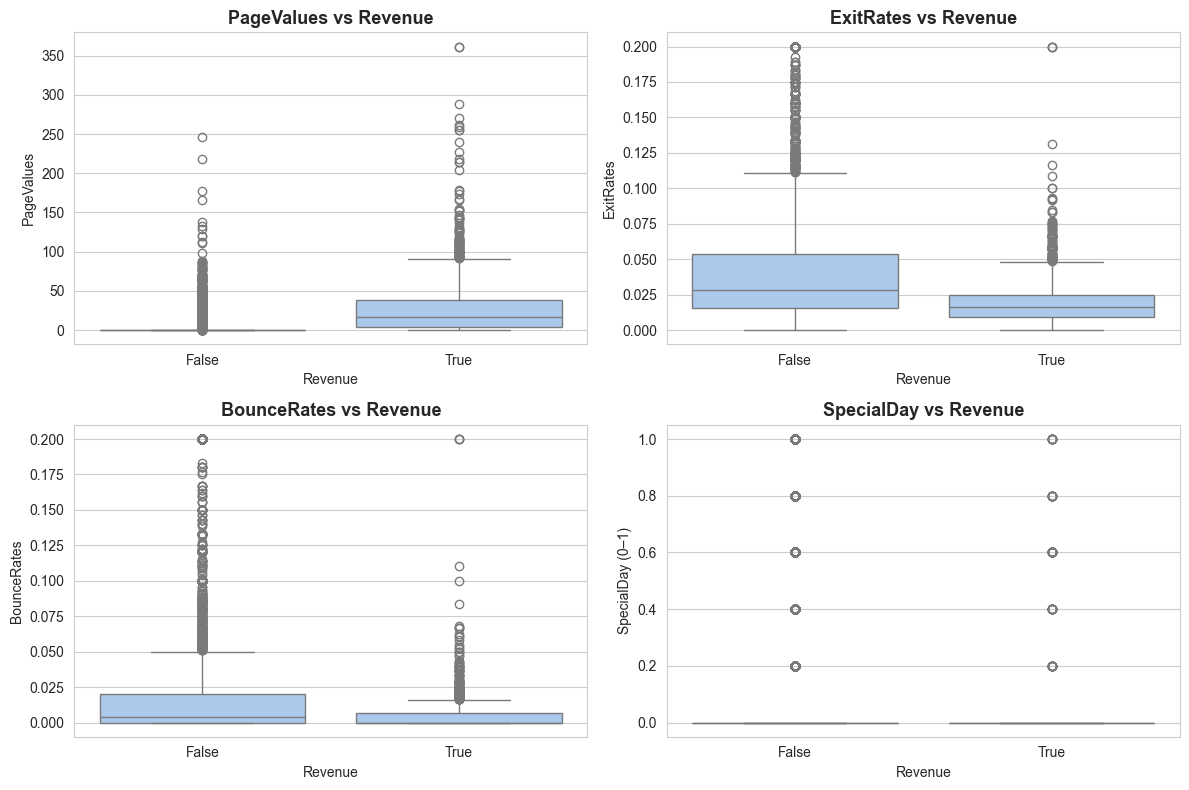

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))
sns.set_style("whitegrid")
sns.set_palette("pastel")

sns.boxplot(x='Revenue', y='PageValues', data=df, ax=axes[0,0])
axes[0,0].set_title('PageValues vs Revenue', fontsize=13, fontweight='bold')
axes[0,0].set_xlabel('Revenue'); axes[0,0].set_ylabel('PageValues')

sns.boxplot(x='Revenue', y='ExitRates', data=df, ax=axes[0,1])
axes[0,1].set_title('ExitRates vs Revenue', fontsize=13, fontweight='bold')
axes[0,1].set_xlabel('Revenue'); axes[0,1].set_ylabel('ExitRates')

sns.boxplot(x='Revenue', y='BounceRates', data=df, ax=axes[1,0])
axes[1,0].set_title('BounceRates vs Revenue', fontsize=13, fontweight='bold')
axes[1,0].set_xlabel('Revenue'); axes[1,0].set_ylabel('BounceRates')

sns.boxplot(x='Revenue', y='SpecialDay', data=df, ax=axes[1,1])
axes[1,1].set_title('SpecialDay vs Revenue', fontsize=13, fontweight='bold')
axes[1,1].set_xlabel('Revenue'); axes[1,1].set_ylabel('SpecialDay (0–1)')

plt.tight_layout()
plt.show()

It can be found that sessions with purchases generally have higher PageValues and lower ExitRates and BounceRates, indicating stronger engagement and smoother navigation before conversion. The SpecialDay variable shows minimal difference between groups, suggesting that proximity to holidays or promotions has limited influence on purchase outcomes in this dataset.

### 2.3.3 Visitor and context features
These features describe the context and identity of each visitor session, including user type, timing, traffic source, and technical attributes.
They help reveal how different types of users access the website and whether factors such as returning visits, weekend activity, or traffic origin affect purchase behavior.

##### a. Distribution of Visitor and Context Features

In [7]:
# To keep the original numeric coding semantics but make labels clear in plots
# Only add prefix if column still numeric
if df['OperatingSystems'].dtype != 'object':
    df['OperatingSystems'] = 'OS-' + df['OperatingSystems'].astype(str)
    df['Browser']         = 'B-'  + df['Browser'].astype(str)
    df['Region']          = 'R-'  + df['Region'].astype(str)
    df['TrafficType']     = 'T-'  + df['TrafficType'].astype(str)


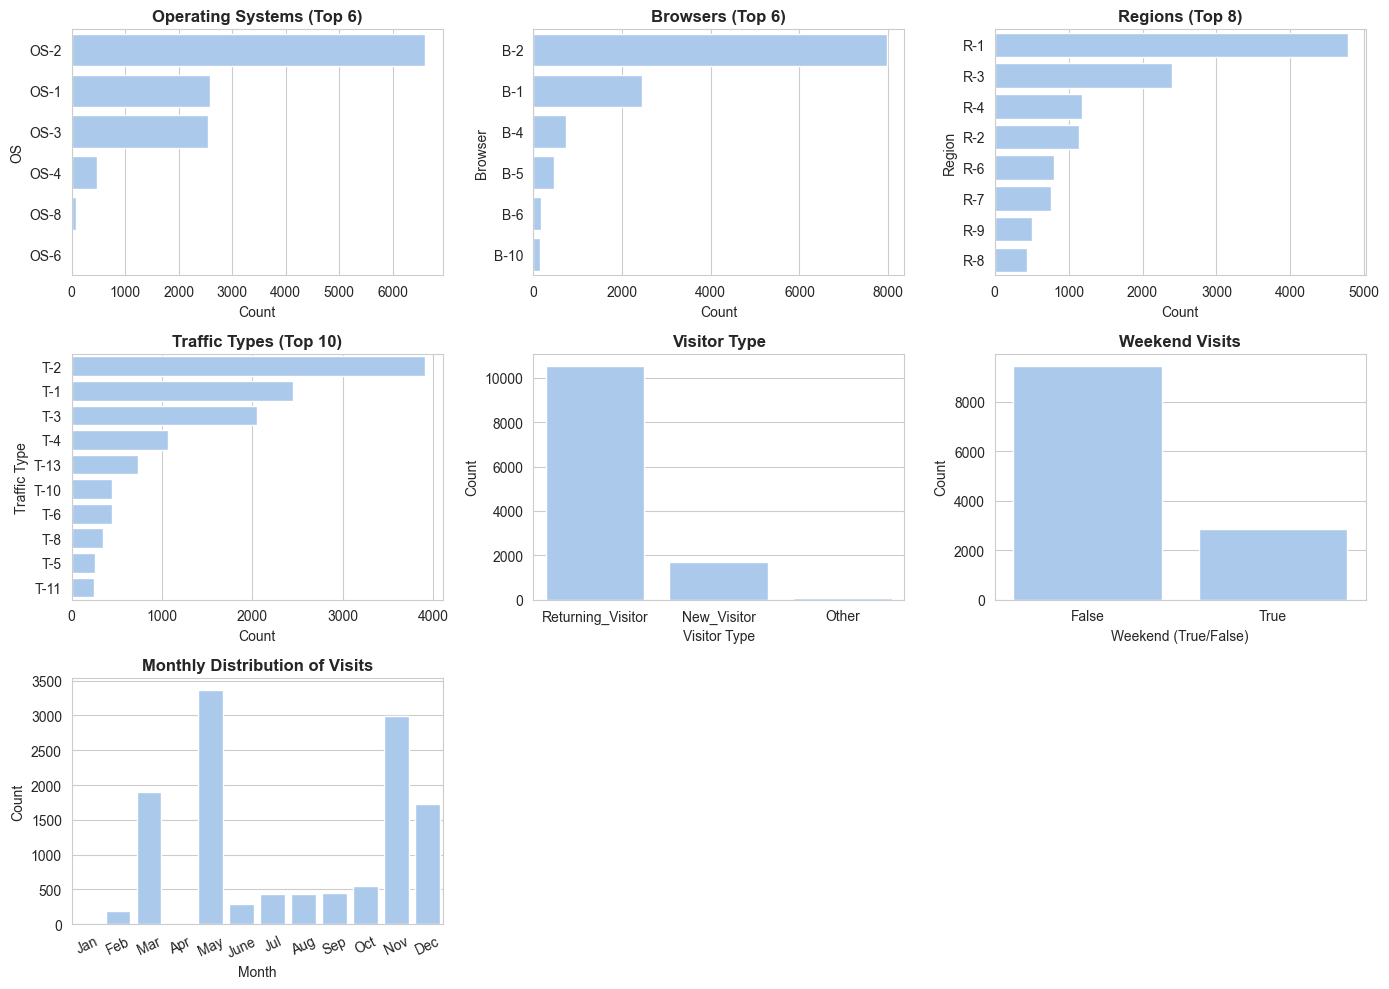

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
sns.set_palette("pastel")

# Define Top-N for high-cardinality features to keep plots readable
top_os = df['OperatingSystems'].value_counts().index[:6]
top_br = df['Browser'].value_counts().index[:6]
top_rg = df['Region'].value_counts().index[:8]
top_tt = df['TrafficType'].value_counts().index[:10]

# Create subplot grid
fig, axes = plt.subplots(3, 3, figsize=(14, 10))
axes = axes.flatten()

# ---- (1) Operating Systems ----
sns.countplot(y='OperatingSystems', 
              data=df[df['OperatingSystems'].isin(top_os)], 
              order=top_os, ax=axes[0])
axes[0].set_title('Operating Systems (Top 6)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Count'); axes[0].set_ylabel('OS')

# ---- (2) Browser ----
sns.countplot(y='Browser',
              data=df[df['Browser'].isin(top_br)],
              order=top_br, ax=axes[1])
axes[1].set_title('Browsers (Top 6)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Count'); axes[1].set_ylabel('Browser')

# ---- (3) Region ----
sns.countplot(y='Region',
              data=df[df['Region'].isin(top_rg)],
              order=top_rg, ax=axes[2])
axes[2].set_title('Regions (Top 8)', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Count'); axes[2].set_ylabel('Region')

# ---- (4) Traffic Type ----
sns.countplot(y='TrafficType',
              data=df[df['TrafficType'].isin(top_tt)],
              order=top_tt, ax=axes[3])
axes[3].set_title('Traffic Types (Top 10)', fontsize=12, fontweight='bold')
axes[3].set_xlabel('Count'); axes[3].set_ylabel('Traffic Type')

# ---- (5) Visitor Type ----
sns.countplot(x='VisitorType', data=df, ax=axes[4])
axes[4].set_title('Visitor Type', fontsize=12, fontweight='bold')
axes[4].set_xlabel('Visitor Type'); axes[4].set_ylabel('Count')

# ---- (6) Weekend ----
sns.countplot(x='Weekend', data=df, ax=axes[5])
axes[5].set_title('Weekend Visits', fontsize=12, fontweight='bold')
axes[5].set_xlabel('Weekend (True/False)'); axes[5].set_ylabel('Count')

# ---- (7) Month ----
# use natural chronological order for better readability
month_order = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
sns.countplot(x='Month', data=df, order=month_order, ax=axes[6])
axes[6].set_title('Monthly Distribution of Visits', fontsize=12, fontweight='bold')
axes[6].set_xlabel('Month'); axes[6].set_ylabel('Count')
axes[6].tick_params(axis='x', rotation=25)

# Hide unused cells
for j in [7, 8]:
    axes[j].axis('off')

# Adjust layout spacing
plt.subplots_adjust(hspace=0.6, wspace=0.3)
plt.tight_layout()
plt.show()

It can be found that most sessions come from a limited set of operating systems, browsers, and regions, with returning visitors forming the dominant group. Visits occur more frequently on weekdays than weekends, and traffic sources are highly concentrated in a few major channels. In addition, the monthly distribution suggests mild seasonal variation, with noticeable peaks in mid-year and toward the end of the year.

##### b. Purchase Rate by Visitor and Context Features

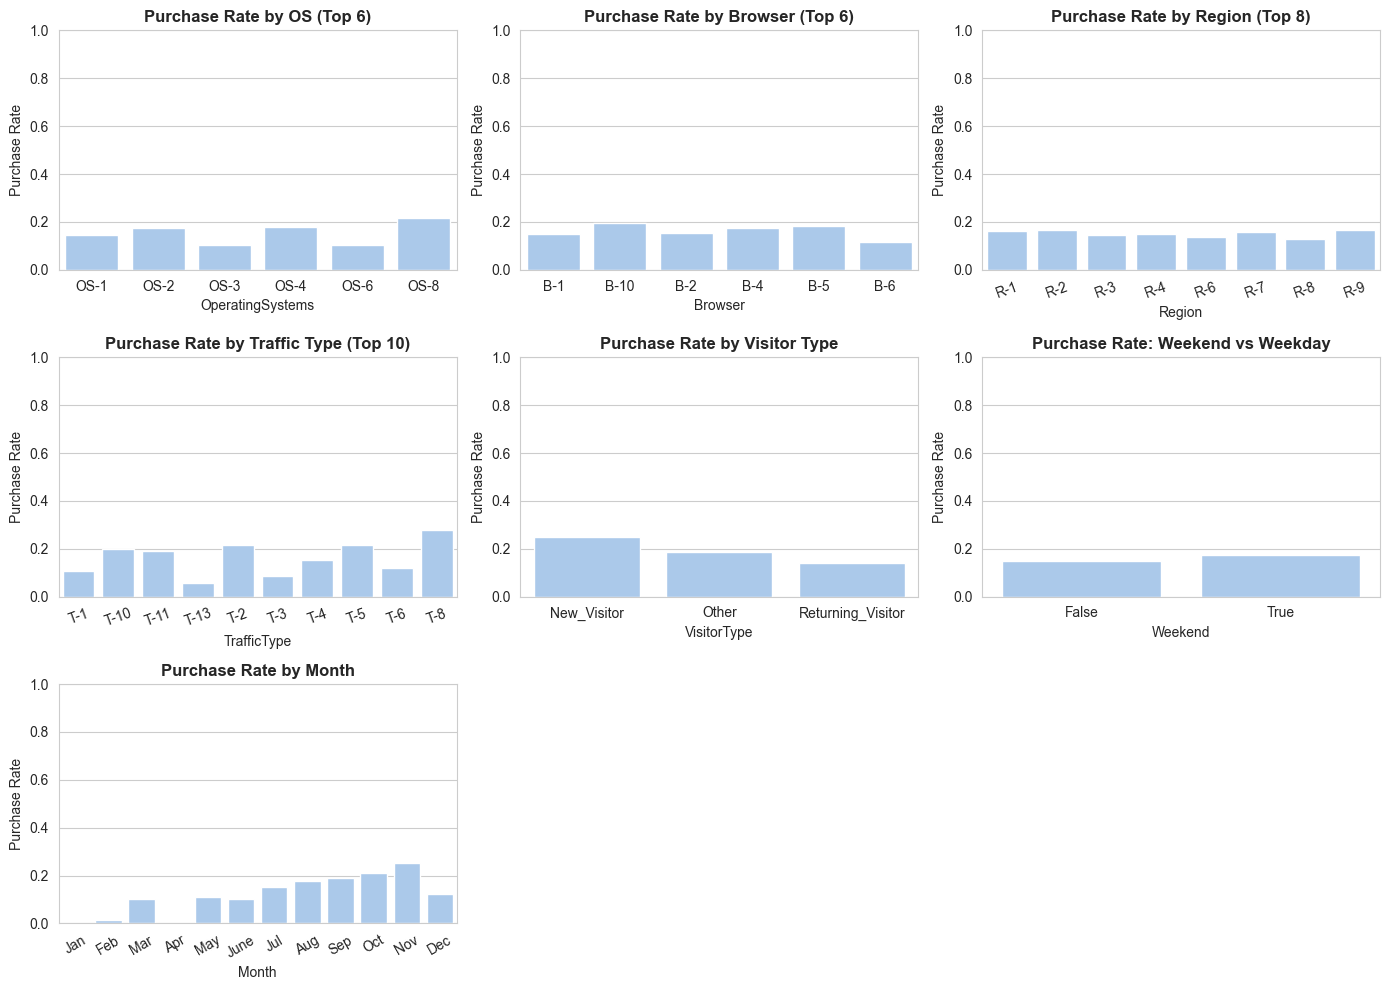

In [9]:
sns.set_style("whitegrid")
sns.set_palette("pastel")

def plot_purchase_rate(ax, col, order=None, top=None, title=None, rotate=20):
    """
    Plot average purchase rate (mean of Revenue) by category.
    Optionally restrict to top-N categories by frequency for readability.
    """
    data = df.copy()
    if top is not None:
        top_cats = data[col].value_counts().index[:top]
        data = data[data[col].isin(top_cats)]
    tmp = (data.assign(Rev=data['Revenue'].astype(int))
               .groupby(col, as_index=False)['Rev'].mean()
               .rename(columns={'Rev':'purchase_rate'}))
    sns.barplot(data=tmp, x=col, y='purchase_rate', order=order, ax=ax)
    ax.set_ylim(0, 1)
    ax.set_title(title or f'Purchase Rate by {col}', fontsize=12, fontweight='bold')
    ax.set_xlabel(col); ax.set_ylabel('Purchase Rate')
    ax.tick_params(axis='x', rotation=rotate)

fig, axes = plt.subplots(3, 3, figsize=(14,10))
axes = axes.flatten()

# (1) OS
plot_purchase_rate(axes[0], 'OperatingSystems', top=6, title='Purchase Rate by OS (Top 6)', rotate=0)

# (2) Browser
plot_purchase_rate(axes[1], 'Browser', top=6, title='Purchase Rate by Browser (Top 6)', rotate=0)

# (3) Region
plot_purchase_rate(axes[2], 'Region', top=8, title='Purchase Rate by Region (Top 8)', rotate=20)

# (4) TrafficType
plot_purchase_rate(axes[3], 'TrafficType', top=10, title='Purchase Rate by Traffic Type (Top 10)', rotate=20)

# (5) VisitorType
plot_purchase_rate(axes[4], 'VisitorType', title='Purchase Rate by Visitor Type', rotate=0)

# (6) Weekend
plot_purchase_rate(axes[5], 'Weekend', title='Purchase Rate: Weekend vs Weekday', rotate=0)

# (7) Month
plot_purchase_rate(axes[6], 'Month', order=month_order, title='Purchase Rate by Month', rotate=30)

# Hide unused cells
for j in [7,8]:
    axes[j].axis('off')

plt.tight_layout()
plt.show()

It can be found that returning visitors have higher purchase rates, while other contextual features such as system, browser, or region show limited impact. Purchase activity slightly increases toward the end of the year, suggesting minor seasonal effects.

---

# 3. Supervised Learning:Classification
## 3.0 Overview

In this section, we focus on supervised learning and evaluate the performance of several classification models on the dataset. Our objective is to predict whether a visitor will make a purchase based on their browsing behavior and session characteristics.

We apply three different classification methods:

- Logistic regression as a linear baseline  
- Random forest model to capture nonlinear patterns  
- Fully connected neural network (FCNN) for high-capacity representation learning  

For each model, we tune key hyperparameters and conduct cross-validation to ensure robust model selection. Finally, we compare the models’ performance using test accuracy, F1-score, and confusion matrices, and summarize insights regarding their effectiveness in distinguishing purchasing vs. non-purchasing sessions.

## 3.1 Data Preprocessing


We inspect the feature distributions and rare categories, ensuring that we understand the data before applying classification models.

In [10]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 

In [11]:

dataset = fetch_ucirepo(id=468)
# Load dataset
df = pd.concat([dataset.data.features, dataset.data.targets], axis=1) 
print(f"Number of samples: {df.shape[0]}, Number of features: {df.shape[1]}")
# Preview the first few rows
df.head()


Number of samples: 12330, Number of features: 18


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [12]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [12]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [13]:
rows_other = df[df["VisitorType"] == "Other"]
print(rows_other.head())

      Administrative  Administrative_Duration  Informational  \
5679               0                     0.00              4   
8006               5                   446.25              0   
8105               0                     0.00              0   
8115               0                     0.00              0   
8187               0                     0.00              0   

      Informational_Duration  ProductRelated  ProductRelated_Duration  \
5679              225.766667             222              9630.209524   
8006                0.000000              18               815.250000   
8105                0.000000               8               493.750000   
8115                0.000000               7                87.000000   
8187                0.000000               4               129.500000   

      BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
5679     0.053355   0.066159         0.0         0.0  June                 8   
8006     0.00000

In [15]:
#Remove 85 rows that the VisitorType = Other
df_for_classification = df[df["VisitorType"] != "Other"].copy()

Then we check the continuous and discrete variables, in order to prapare for one-hot encoding.

In [16]:
import pandas as pd
df = df_for_classification  

# Threshold: numeric columns with more than 'threshold_unique'
# distinct values will be treated as continuous variables
threshold_unique = 30

continuous_cols = []
categorical_cols = []

for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):  # numeric type
        if df[col].nunique(dropna=True) > threshold_unique:
            continuous_cols.append(col)
        else:
            categorical_cols.append(col)
    else:
        categorical_cols.append(col)

print("Continuous variables:", continuous_cols)
print("Categorical variables:", categorical_cols)

print("\n===== Range of continuous variables =====")
for col in continuous_cols:
    col_min = df[col].min()
    col_max = df[col].max()
    print(f"{col}: min = {col_min}, max = {col_max}")

print("\n===== Unique values of categorical variables =====")
for col in categorical_cols:
    uniq_vals = df[col].dropna().unique()
    print(f"{col}: {len(uniq_vals)} unique values -> {sorted(uniq_vals)}")

Continuous variables: ['Administrative_Duration', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']
Categorical variables: ['Administrative', 'Informational', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']

===== Range of continuous variables =====
Administrative_Duration: min = 0.0, max = 3398.75
Informational_Duration: min = 0.0, max = 2549.375
ProductRelated: min = 0, max = 705
ProductRelated_Duration: min = 0.0, max = 63973.52223
BounceRates: min = 0.0, max = 0.2
ExitRates: min = 0.0, max = 0.2
PageValues: min = 0.0, max = 361.7637419

===== Unique values of categorical variables =====
Administrative: 27 unique values -> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27]
Informational: 17 unique values -> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 24]
SpecialDay: 6 unique values -> [0.0, 0.2, 

In [17]:
import pandas as pd
df = df_for_classification.copy()
bool_map = {True: 1, False: 0, "True": 1, "False": 0}
df["Weekend"] = df["Weekend"].map(bool_map)
df["Revenue"] = df["Revenue"].map(bool_map)

ohe_cols = [
    "Month",
    "OperatingSystems",
    "Browser",
    "Region",
    "TrafficType",
    "VisitorType"
]
df_encoded = pd.get_dummies(df, columns=ohe_cols, prefix=ohe_cols)
dummy_cols = [c for c in df_encoded.columns if any(c.startswith(p + "_") for p in ohe_cols)]
df_encoded[dummy_cols] = df_encoded[dummy_cols].astype(int)
df_for_classification_encoded = df_encoded

In [18]:
df_for_classification_encoded.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'OperatingSystems_1', 'OperatingSystems_2',
       'OperatingSystems_3', 'OperatingSystems_4', 'OperatingSystems_5',
       'OperatingSystems_6', 'OperatingSystems_7', 'OperatingSystems_8',
       'Browser_1', 'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5',
       'Browser_6', 'Browser_7', 'Browser_8', 'Browser_9', 'Browser_10',
       'Browser_11', 'Browser_12', 'Browser_13', 'Region_1', 'Region_2',
       'Region_3', 'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8',
       'Region_9', 'TrafficType_1', 'TrafficType_2', 'TrafficType_3',
       'TrafficType_4', 'TrafficType_5', 'TrafficType_6', '

In [19]:
df_for_classification_encoded.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


We split training and testing dataset

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

df = df_for_classification_encoded.copy()

X = df.drop("Revenue", axis=1).values
y = df["Revenue"].values  # 0/1

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,       
    random_state=5102,
    stratify=y
)

## 3.2 Logistic Regression with Regularization Tuning


We train a logistic regression model to predict whether a visitor will make a purchase. The data is first standardized, and then we use grid search with cross-validation to find the best regularization strength C. 

In [21]:
logit = LogisticRegression(
    penalty="l2",        
    solver="liblinear",  
    max_iter=1000
)

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logit", logit)
])
param_grid = {
    "logit__C": np.logspace(-3, 3, 5)   
}
grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,                
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logit',
                                        LogisticRegression(max_iter=1000,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'logit__C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03])},
             scoring='accuracy', verbose=1)

In [22]:
print("Best params:", grid_search.best_params_)
print("Best CV accuracy:", grid_search.best_score_)

Best params: {'logit__C': 31.622776601683793}
Best CV accuracy: 0.8836257044931294


In [23]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [24]:
print("\nTest accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))


Test accuracy: 0.8864842792976725

Confusion matrix:
 [[2020   51]
 [ 227  151]]

Classification report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      2071
           1       0.75      0.40      0.52       378

    accuracy                           0.89      2449
   macro avg       0.82      0.69      0.73      2449
weighted avg       0.88      0.89      0.87      2449



The logistic regression model with **L2** regularization achieved its best performance at C ≈ 31.62, indicating relatively weak regularization. The model reached a cross-validation accuracy of 0.884 and a test accuracy of 0.886, suggesting good generalization without signs of overfitting.

Model performance differs notably across the two classes due to class imbalance:
- **Majority class** (Revenue = 0)
  - Precision: 0.90
  - Recall: 0.98
  - F1-score: 0.94
  
    The model classifies non-purchasing sessions very reliably, with very few false positives.
- **Minority class** (Revenue = 1)
  - Precision: 0.75
  - Recall: 0.40
  - F1-score: 0.52
  
    Performance on the purchasing class is significantly weaker, primarily due to the low recall.

The confusion matrix
(TN = 2020, FP = 51, FN = 227, TP = 151)
reveals that the model is conservative when predicting purchases—it avoids false positives but produces many false negatives. This pattern is typical in imbalanced datasets, where the classifier tends to favor the majority class.

## 3.3 Random Forest Classification and Hyperparameter Optimization
We train a Random Forest classifier and tune key hyperparameters—including **the number of trees**, **maximum depth**, and **splitting criterio**n—using GridSearchCV.   

In [25]:
from sklearn.model_selection import  GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)
rf = RandomForestClassifier(
    random_state=5102,
    n_jobs=-1
)
param_grid = {
    "n_estimators": [100,200],  # number of trees
    "max_depth": [10, 15, 20],         # maximum depth of each tree
    "criterion": ["gini", "entropy"]  # split criterion
}

grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                 
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=5102),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [26]:
print("Best params:", grid_search_rf.best_params_)
print("Best CV accuracy:", grid_search_rf.best_score_)

Best params: {'criterion': 'gini', 'max_depth': 15, 'n_estimators': 200}
Best CV accuracy: 0.9038375472700567


In [27]:
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print("\nTest accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("\nConfusion matrix (Random Forest):\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification report (Random Forest):\n", classification_report(y_test, y_pred_rf))


Test accuracy (Random Forest): 0.9036341363821968

Confusion matrix (Random Forest):
 [[2009   62]
 [ 174  204]]

Classification report (Random Forest):
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      2071
           1       0.77      0.54      0.63       378

    accuracy                           0.90      2449
   macro avg       0.84      0.75      0.79      2449
weighted avg       0.90      0.90      0.90      2449



The Random Forest classifier, tuned via cross-validation, achieved its best performance with:
 - Criterion: gini
 - Max depth: 15
 - Number of estimators: 200
 - Best CV accuracy: 0.9038
 - Test accuracy: 0.9036

This indicates strong generalization performance.

Model performance varies across the two classes due to class imbalance:
- **Majority class** (Revenue = 0)
	- Precision: 0.92
	- Recall: 0.97
	- F1-score: 0.94    
    The model detects non-purchasing sessions very reliably, with only 62 false positives (confusing non-buyers as buyers). This reflects strong performance on the dominant class.

- **Minority class** (Revenue = 1)
	- Precision: 0.77
	- Recall: 0.54
	- F1-score: 0.63
    Performance on the purchasing class is weaker, mainly due to low recall—the model correctly identifies 204 true buyers, but still misses 174 buyers (false negatives), a common challenge under class imbalance.

The confusion matrix(TN = 2009, FP = 62, FN = 174, TP = 204)
shows that the model is good at avoiding false positives, but still struggles with capturing all true purchasing sessions.

Overall, the Random Forest model achieves a macro-averaged F1 of 0.79 and a weighted F1 of 0.90, indicating high overall accuracy with a reasonably strong—but not perfect—ability to recognize purchasing behavior.

To further interpret the model’s behavior, we visualize the first three levels of one representative decision tree from the forest.

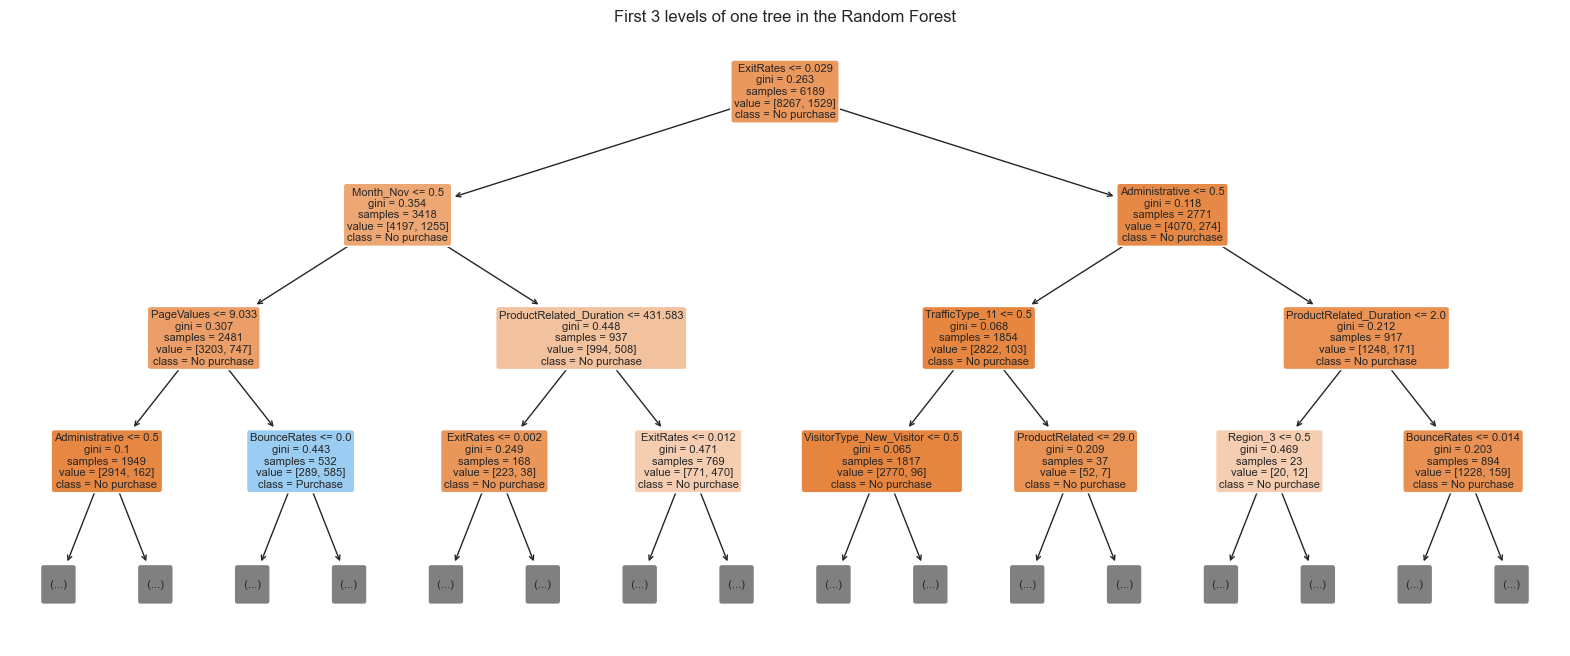

In [28]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

feature_names = df.drop("Revenue", axis=1).columns
one_tree = best_rf.estimators_[0]
plt.figure(figsize=(20, 8))
plot_tree(
    one_tree,
    feature_names=feature_names,
    class_names=["No purchase", "Purchase"],  
    max_depth=3,         
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("First 3 levels of one tree in the Random Forest")
plt.show()

The structure reveals several key patterns in how the model separates purchasing vs. non-purchasing sessions:
1. **ExitRates is the primary split**
	- The root node splits on ExitRates ≤ 0.029.
	- Low exit rates → sessions are more likely to become purchases.
	- High exit rates → sessions are mostly non-purchases.
  
    This confirms that exit rate is one of the strongest behavioral indicators of purchase intention.

2. **Path for low ExitRates (potential buyers)**
    Among users with low exit rates, the tree further splits using:
    -  Month_Nov (whether the visit happens in November)
	- PageValues (page-level economic value)
	- ProductRelated_Duration (time spent on product-related pages)
  
    These features reflect seasonal patterns and engagement intensity that help differentiate true buyers from low-exit non-buyers.

3. **Path for high ExitRates (likely non-buyers)**
    For sessions with high exit rates, the tree leans heavily on:
    - Administrative pages viewed
	- ProductRelated_Duration
	- TrafficType
	- Region
	- BounceRates
  
    These attributes help the model capture browsing behaviors where users leave quickly or exhibit shallow engagement—typical of non-purchasing visits.

## 3.4 Fully Connected Neural Network: Tuning Hidden Structure, Dropout, Learning Rate, and Class Weights
In this section, we build a fully connected neural network (FCNN) classifier and tune key hyperparameters that control the model’s capacity and regularization. 

In [6]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
input_dim = X_train.shape[1]

We first compute class weights automatically based on the frequency of each class in the training set. 
$$
w_c = \frac{n_{\text{samples}}}{n_{\text{classes}} \cdot n_c}
$$
where n_c is the number of samples in class c.

Since the dataset is highly imbalanced (with far fewer purchasing sessions), assigning larger weights to the minority class helps the model pay more attention to purchase cases during training and reduces the impact of class imbalance.

In [8]:
classes = np.unique(y_train)
class_weights_array = compute_class_weight(
    class_weight="balanced",
    classes=classes,
    y=y_train
)
class_weight_balanced = {cls: w for cls, w in zip(classes, class_weights_array)}
print("Balanced class weights:", class_weight_balanced)

Balanced class weights: {0: 0.5914030427432987, 1: 3.2351387054161163}


In [12]:
from tensorflow.keras import backend as K
def create_model(hidden_structure=(32, 16),
                 alpha=1e-4,
                 dropout_rate=0.0,
                 learning_rate=0.001): 
    K.clear_session()
    tf.random.set_seed(5102)
    np.random.seed(5102)
    model = Sequential()
    model.add(Dense(hidden_structure[0],
                    activation="relu",
                    input_dim=input_dim,
                    kernel_regularizer=l2(alpha)))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))

    model.add(Dense(hidden_structure[1],
                    activation="relu",
                    kernel_regularizer=l2(alpha)))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation="sigmoid"))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    return model

In [13]:
base_clf = KerasClassifier(
    build_fn=create_model,
    epochs=10,           
    batch_size=32,
    verbose=1
)

C:\Users\hch12\AppData\Local\Temp\ipykernel_186928\4249322729.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  base_clf = KerasClassifier(


We search over different hidden-layer structures, dropout rates, learning rates, and class-weight strategies to address class imbalance. Using GridSearchCV together with the SciKeras interface, we train multiple network configurations and select the one achieving the best cross-validation performance. 

In [15]:
param_grid = {
    "hidden_structure": [(32, 16),(64,32)],         
    "alpha": [1e-4],                        
    "dropout_rate": [0.0, 0.2],             
    "learning_rate": [0.001,0.01],               
    "class_weight": [None, class_weight_balanced]  
}

grid_search_fcnn = GridSearchCV(
    estimator=base_clf,
    param_grid=param_grid,
    cv=2,                
    scoring="accuracy",
    n_jobs=1,           
    verbose=1
)

grid_search_fcnn.fit(X_train, y_train)

print("Best params (FCNN):", grid_search_fcnn.best_params_)
print("Best CV accuracy (FCNN):", grid_search_fcnn.best_score_)

Fitting 2 folds for each of 16 candidates, totalling 32 fits
Epoch 1/10
154/154 [==============================] - 4s 4ms/step - loss: 0.4608 - accuracy: 0.8224
Epoch 2/10
154/154 [==============================] - 1s 4ms/step - loss: 0.3386 - accuracy: 0.8669
Epoch 3/10
154/154 [==============================] - 1s 3ms/step - loss: 0.3010 - accuracy: 0.8787
Epoch 4/10
154/154 [==============================] - 1s 4ms/step - loss: 0.2781 - accuracy: 0.8879
Epoch 5/10
154/154 [==============================] - 1s 4ms/step - loss: 0.2632 - accuracy: 0.8957
Epoch 6/10
154/154 [==============================] - 1s 4ms/step - loss: 0.2512 - accuracy: 0.8981
Epoch 7/10
154/154 [==============================] - 1s 4ms/step - loss: 0.2416 - accuracy: 0.9038
Epoch 8/10
154/154 [==============================] - 1s 4ms/step - loss: 0.2350 - accuracy: 0.9083
Epoch 9/10
154/154 [==============================] - 1s 4ms/step - loss: 0.2271 - accuracy: 0.9098
Epoch 10/10
154/154 [==================

The optimized network is then evaluated on the test set using accuracy, confusion matrix, and F1-scores.

In [16]:
best_fcnn = grid_search_fcnn.best_estimator_

y_pred_fcnn = best_fcnn.predict(X_test)
y_pred_fcnn = (y_pred_fcnn > 0.5).astype(int).ravel() 

print("\nTest accuracy (FCNN):", accuracy_score(y_test, y_pred_fcnn))
print("\nConfusion matrix (FCNN):\n", confusion_matrix(y_test, y_pred_fcnn))
print("\nClassification report (FCNN):\n", classification_report(y_test, y_pred_fcnn))

77/77 [==============================] - 0s 2ms/step

Test accuracy (FCNN): 0.897917517354022

Confusion matrix (FCNN):
 [[1972   99]
 [ 151  227]]

Classification report (FCNN):
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      2071
           1       0.70      0.60      0.64       378

    accuracy                           0.90      2449
   macro avg       0.81      0.78      0.79      2449
weighted avg       0.89      0.90      0.89      2449



The fully connected neural network (FCNN) tuned via cross-validation achieved its best performance with the following configuration:
 - Hidden structure: (64, 32)
 - L2 regularization (α): 0.0001
 - Dropout rate: 0.2
 - Learning rate: 0.001
 - Class weight: None
 - Best CV accuracy: 0.8927
 - Test accuracy: 0.8979

Model performance across the two classes is summarized below:

- Majority class (Revenue = 0)
	- Precision: 0.93
	- Recall: 0.95
	- F1-score: 0.94
  
    The model classifies non-purchasing sessions very reliably, with few false positives.

Confusion matrix counts:
   - True negatives (TN): 1972
   - False positives (FP): 99

- Minority class (Revenue = 1)
	- Precision: 0.70
	- Recall: 0.60
	- F1-score: 0.64
    
    The model identifies purchasing sessions reasonably well but still misses a notable number of actual buyers (lower recall).

Confusion matrix counts:
   - True positives (TP): 227
   - False negatives (FN): 151

⸻

Overall Performance
   - Macro F1-score: 0.79
   - Weighted F1-score: 0.89

Overall, the FCNN achieves high accuracy and relatively balanced performance, though the class imbalance still leads to weaker recall on the minority (purchase) class.

## 3.5 Comparison of Classification Models

We compare **Logistic Regression**, **Random Forest**, and a **Fully Connected Neural Network (FCNN)** in terms of model structure, performance, interpretability, and practical usefulness.

---

### 3.5.1 Structural Differences

**Logistic Regression**
- Linear decision boundary  
- Highly interpretable baseline model  

**Random Forest**
- Ensemble of decision trees  
- Captures nonlinear patterns and feature interactions  

**FCNN**
- Flexible nonlinear architecture  
- Learns complex relationships but requires more tuning  

---

### 3.5.2 Model Selection and Performance

**Logistic Regression**
- Tuned regularization strength  
- **CV Accuracy ≈ 0.884**, **Test Accuracy ≈ 0.886**  
- Strong performance on non-purchase class; lower recall for purchases  

**Random Forest**
- Tuned number of trees, max depth, and splitting criterion  
- **CV Accuracy ≈ 0.904**, **Test Accuracy ≈ 0.904**  
- Best overall accuracy and balanced performance across both classes  

**FCNN**
- Tuned hidden-layer sizes, dropout rate, learning rate, and class weights  
- **CV Accuracy ≈ 0.893**, **Test Accuracy ≈ 0.898**  
- Highest recall for purchase class (Revenue = 1)  

---

### 3.5.3 Interpretability

- **Logistic Regression:** most interpretable  
- **Random Forest:** moderately interpretable (feature importance, tree visualization)  
- **FCNN:** least interpretable due to model complexity  

---

### 3.5.4 Practical Recommendation

| Model | Strengths | Best Use Case |
|-------|-----------|----------------|
| **Logistic Regression** | Simple, interpretable baseline | When interpretability is essential |
| **Random Forest** | Best overall accuracy, robust | General-purpose classification |
| **FCNN** | Best recall for buyers | When identifying buyers is top priority |

---

### 3.5.5 Summary

- **Random Forest** is the strongest overall classifier for this dataset.  
- **FCNN** is preferred if maximizing recall for buyers is the primary business goal.  
- **Logistic Regression** provides a clear and interpretable baseline but is outperformed by nonlinear models.


---


# 4. Supervised Learning: Regression
## 4.0 Overview

In this section, we focus on predicting **PageValues**.  While the original target of the dataset is the categorical variable — Revenue, we choose **PageValues** for the regression task because it's a continuous key indicator reflecting the likelihood that a webpage contributes to a purchase. The goal is to understand how user behavioral signals (e.g., BounceRates, ExitRates, ProductRelated pages) and contextual factors (e.g., Month, TrafficType, VisitorType) influence this continuous outcome.

To achieve this, we apply two types of regression models:

- **Ridge Regression** (linear model with L2 regularization), which captures additive linear relationships while controlling for multicollinearity.
- **XGBoost Regressor** (nonlinear, tree-based model), which can learn complex interactions and nonlinear patterns in user browsing behavior.

By comparing the predictive performance of these linear and nonlinear approaches, we aim to:

- Identify which behavioral and contextual features contribute most strongly to PageValues.
- Evaluate whether PageValues can be reliably predicted from session information.
- Assess the suitability of linear vs. nonlinear modeling strategies for this dataset.

This analysis helps highlight the key drivers behind webpage conversion value and provides insights into how user behavior translates into potential revenue impact.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor  
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from ucimlrepo import fetch_ucirepo 
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100

## 4.1 Data Preprocessing
We load the dataset and separate PageValues as the regression target while keeping the remaining fields as input features. 

In [31]:

dataset = fetch_ucirepo(id=468)
# Load dataset
df = pd.concat([dataset.data.features, dataset.data.targets], axis=1) 
print(f"Number of samples: {df.shape[0]}, Number of features: {df.shape[1]}")
# Preview the first few rows
df.head()


Number of samples: 12330, Number of features: 18


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [32]:
# Define target and features
y = df['PageValues']
X = df.drop(['PageValues', 'Revenue'], axis=1)

print(f"Number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")

Number of features: 16
Number of samples: 12330


The features are then divided into numerical, categorical, and boolean types, and a ColumnTransformer is applied to standardize numerical variables, one-hot encode categorical variables, and pass through boolean features unchanged. This preprocessing ensures that both Ridge and XGBoost models receive clean, consistent, and properly formatted inputs.

In [33]:
# Define feature types
numerical_features = [
    'Administrative', 'Administrative_Duration',
    'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'SpecialDay',
    'OperatingSystems', 'Browser', 'Region', 'TrafficType'
]
categorical_features = ['Month', 'VisitorType']
boolean_feature = ['Weekend']

# Create preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('bool', 'passthrough', boolean_feature)
    ],
    remainder='drop'
)

print(f"Numerical features: {len(numerical_features)} (StandardScaler)")
print(f"Categorical features: {len(categorical_features)} (One-Hot Encoding)")
print(f"Boolean features: {len(boolean_feature)}")

Numerical features: 13 (StandardScaler)
Categorical features: 2 (One-Hot Encoding)
Boolean features: 1


We split training and testing dataset

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 9864 samples
Test set size: 2466 samples


## 4.2 Model Fitting and Hyperparameter Tuning
We fit two regression models—Ridge Regression as a linear baseline and XGBoost as a nonlinear gradient-boosted model—to predict PageValues from user behavioral and session features. 


### **Ridge Regression (Linear Model)**

In [35]:
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

ridge_param_grid = {
    'regressor__alpha': [0.01, 0.1, 1.0, 5.0, 10.0, 50.0],
    'regressor__fit_intercept': [True, False]
}

# Grid search with 5-fold CV
ridge_grid_search = GridSearchCV(
    ridge_pipeline, 
    param_grid=ridge_param_grid, 
    cv=5, 
    scoring='r2', 
    n_jobs=-1,
    verbose=1
)
ridge_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Administrative',
                                                                          'Administrative_Duration',
                                                                          'Informational',
                                                                          'Informational_Duration',
                                                                          'ProductRelated',
                                                                          'ProductRelated_Duration',
                                                                          'BounceRates',
                                                                          'ExitRates',
                                                                          'SpecialDay',
                                                                          'OperatingSystems',
                                                                          'Browser',
                                                                          'Region',
                                                                          'TrafficType']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Month',
                                                                          'VisitorType']),
                                                                        ('bool',
                                                                         'passthrough',
                                                                         ['Weekend'])])),
                                       ('regressor', Ridge())]),
             n_jobs=-1,
             param_grid={'regressor__alpha': [0.01, 0.1, 1.0, 5.0, 10.0, 50.0],
                         'regressor__fit_intercept': [True, False]},
             scoring='r2', verbose=1)


### **XGBoost Regressor (Non-Linear Model)**

In [36]:
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42, n_jobs=-1))
])

xgb_param_grid = {
    'regressor__max_depth': [2, 3, 4, 5, 7, 10],
    'regressor__learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
    'regressor__n_estimators': [100, 200, 500, 800]
}

# Grid search with 5-fold CV
xgb_grid_search = GridSearchCV(
    xgb_pipeline, 
    param_grid=xgb_param_grid, 
    cv=5, 
    scoring='r2', 
    n_jobs=-1,
    verbose=1
)
xgb_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Administrative',
                                                                          'Administrative_Duration',
                                                                          'Informational',
                                                                          'Informational_Duration',
                                                                          'ProductRelated',
                                                                          'ProductRelated_Duration',
                                                                          'BounceRates',
                                                                          'ExitRates',
                                                                          'SpecialDay',
                                                                          'OperatingSystems',
                                                                          'Browser',
                                                                          'Region',
                                                                          'TrafficType']),
                                                                        ('cat',
                                                                         OneHot...
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=100,
                                                     n_jobs=-1,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'regressor__learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
                         'regressor__max_depth': [2, 3, 4, 5, 7, 10],
                         'regressor__n_estimators': [100, 200, 500, 800]},
             scoring='r2', verbose=1)

Using GridSearchCV, we identify the best hyperparameter configuration for both regression models.

In [37]:
# Get best models
best_ridge_model = ridge_grid_search.best_estimator_
best_xgb_model = xgb_grid_search.best_estimator_

print("\nRidge Regression")
print(f"Best parameters: {ridge_grid_search.best_params_}")
print(f"Best CV R² score: {ridge_grid_search.best_score_:.6f}")

print("\nXGBoost Regressor")
print(f"Best parameters: {xgb_grid_search.best_params_}")
print(f"Best CV R² score: {xgb_grid_search.best_score_:.6f}")


Ridge Regression
Best parameters: {'regressor__alpha': 50.0, 'regressor__fit_intercept': True}
Best CV R² score: 0.050764

XGBoost Regressor
Best parameters: {'regressor__learning_rate': 0.05, 'regressor__max_depth': 2, 'regressor__n_estimators': 200}
Best CV R² score: 0.094045


## 4.3 Model Evaluation and Comparison
We apply each optimized model to the test set and compute standard regression metrics, including **R²**, **MAE**, and **RMSE**. By comparing these metrics side-by-side, we assess how well a linear model and a nonlinear ensemble model capture the relationship between user behaviors and PageValues, and identify which method provides more accurate and reliable predictions for this task.

In [38]:
# Function to calculate and display metrics
def print_metrics(model_name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    
    print(f"\n{'='*60}")
    print(f"{model_name} - Test Set Performance")
    print(f"{'='*60}")
    print(f"R² Score:  {r2:.4f}")
    print(f"MAE:       {mae:.4f}")
    print(f"RMSE:      {rmse:.4f}")
    return r2, mae, rmse

In [39]:
# Make predictions on test set
y_pred_ridge = best_ridge_model.predict(X_test)
y_pred_xgb = best_xgb_model.predict(X_test)

ridge_r2, ridge_mae, ridge_rmse = print_metrics("Ridge Regression", y_test, y_pred_ridge)
xgb_r2, xgb_mae, xgb_rmse = print_metrics("XGBoost Regressor", y_test, y_pred_xgb)


Ridge Regression - Test Set Performance
R² Score:  0.0461
MAE:       9.2861
RMSE:      18.4612

XGBoost Regressor - Test Set Performance
R² Score:  0.0949
MAE:       8.3053
RMSE:      17.9828


In [40]:
# Create comparison table
comparison_df = pd.DataFrame({
    'Model': ['Ridge Regression', 'XGBoost Regressor'],
    'R² Score': [ridge_r2, xgb_r2],
    'MAE': [ridge_mae, xgb_mae],
    'RMSE': [ridge_rmse, xgb_rmse]
})

comparison_df['R² Score'] = comparison_df['R² Score'].map('{:.4f}'.format)
comparison_df['MAE'] = comparison_df['MAE'].map('{:.4f}'.format)
comparison_df['RMSE'] = comparison_df['RMSE'].map('{:.4f}'.format)

print(comparison_df.to_string(index=False))

            Model R² Score    MAE    RMSE
 Ridge Regression   0.0461 9.2861 18.4612
XGBoost Regressor   0.0949 8.3053 17.9828


We observe that XGBoost consistently outperforms Ridge Regression across all metrics (R², MAE, RMSE), indicating that the nonlinear model is better suited for capturing the underlying patterns in this task.

However, both models achieve very low R² scores (below 0.11). This suggests that the prediction of PageValues remains challenging, possibly because:
 - PageValues is highly **sparse** (only ~22.14% of samples have non-zero values), making it difficult for models to learn meaningful patterns.
 - Traditional models such as Ridge and XGBoost may not fully capture the complex factors influencing page value behavior.

In summary, while XGBoost shows relatively better performance, neither model achieves strong predictive accuracy, implying that more advanced techniques or task redefinition may be required.

## 4.4 Visualization and Further Analysis

### 4.4.1 Prediction Performance
To evaluate how well each regression model predicts `PageValues`, we visualize the relationship between the **actual values** and the **model predictions** using scatter plots.

### **Ridge Regression (Linear Model)**

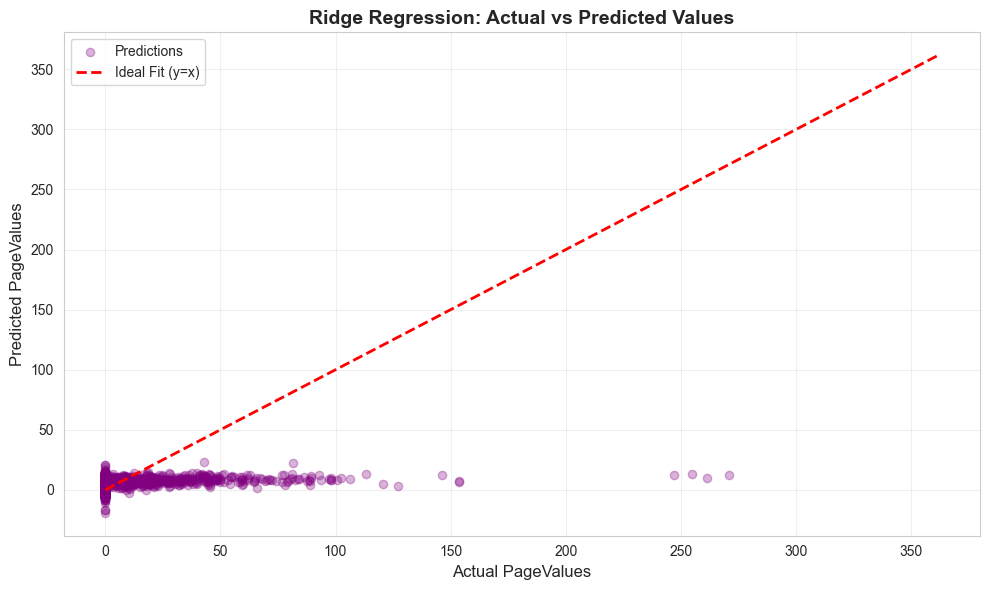

In [41]:
all_feature_names = numerical_features + list(best_ridge_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)) + boolean_feature

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.3, color='purple', label='Predictions')
plt.plot([0, y.max()], [0, y.max()], 'r--', lw=2, label='Ideal Fit (y=x)')
plt.title('Ridge Regression: Actual vs Predicted Values', fontsize=14, fontweight='bold')
plt.xlabel('Actual PageValues', fontsize=12)
plt.ylabel('Predicted PageValues', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### **XGBoost Regressor (Non-Linear Model)**

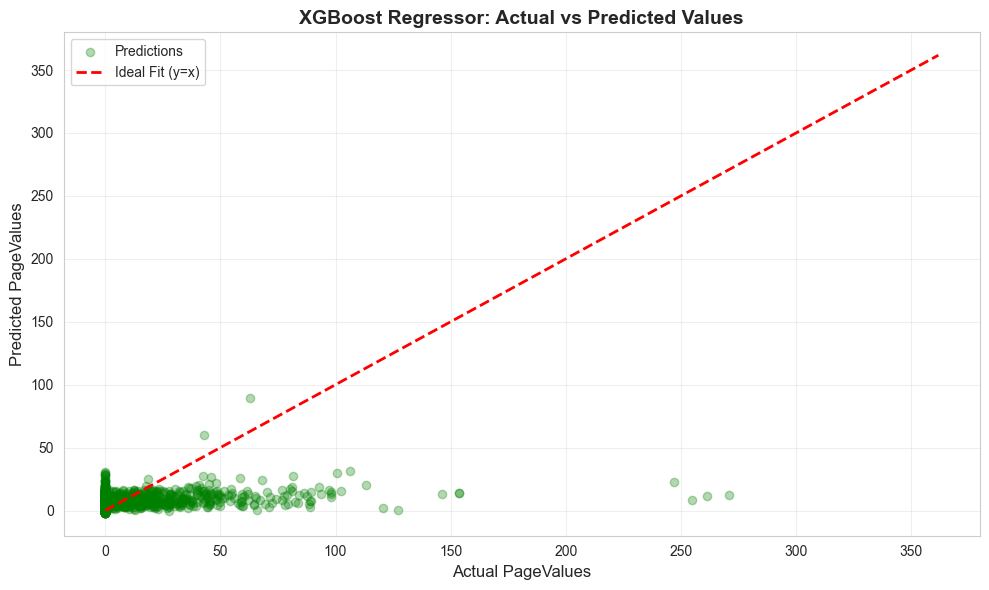

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.3, color='green', label='Predictions')
plt.plot([0, y.max()], [0, y.max()], 'r--', lw=2, label='Ideal Fit (y=x)')
plt.title('XGBoost Regressor: Actual vs Predicted Values', fontsize=14, fontweight='bold')
plt.xlabel('Actual PageValues', fontsize=12)
plt.ylabel('Predicted PageValues', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

These plots illustrate that both models systematically underpredict higher PageValues and show large variance—consistent with the low R² scores observed earlier.

### 4.4.2 Feature Importance and Interpretation
To better understand what drives `PageValues`，we extract the **Top 10 most influential features** from both regressors.

### **Ridge Regression (Linear Model)**

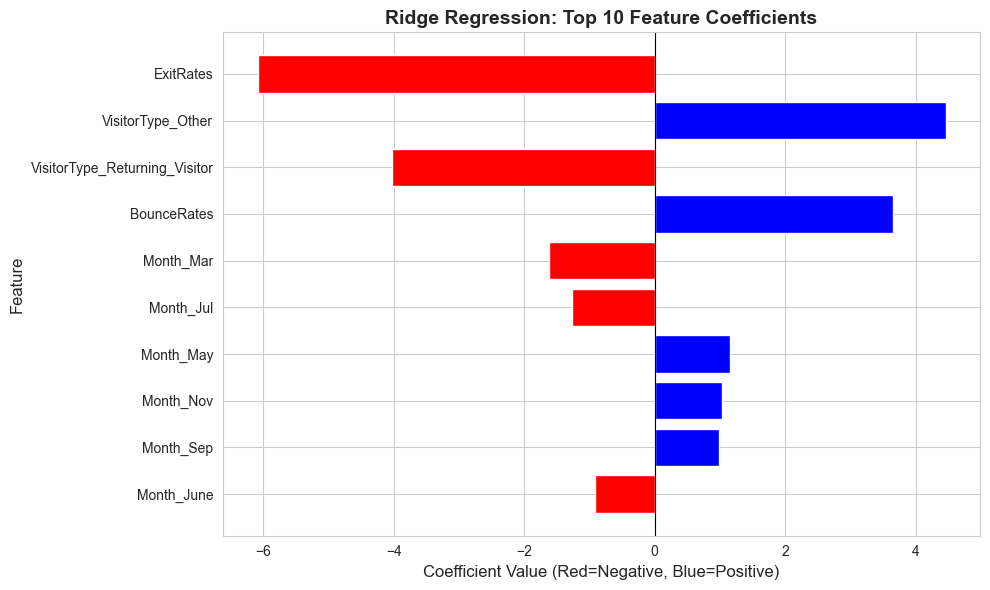

In [43]:
ridge_coef = best_ridge_model.named_steps['regressor'].coef_

# Create DataFrame and get top 10
coef_df = pd.DataFrame({
    'feature': all_feature_names,
    'coefficient': ridge_coef
}).assign(abs_coef=lambda x: x['coefficient'].abs()
).nlargest(10, 'abs_coef')

# Plot
plt.figure(figsize=(10, 6))
colors = ['red' if c < 0 else 'blue' for c in coef_df['coefficient']]
plt.barh(coef_df['feature'], coef_df['coefficient'], color=colors)
plt.axvline(0, color='black', linestyle='-', linewidth=0.8)
plt.title('Ridge Regression: Top 10 Feature Coefficients', fontsize=14, fontweight='bold')
plt.xlabel('Coefficient Value (Red=Negative, Blue=Positive)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### **XGBoost Regressor (Non-Linear Model)**

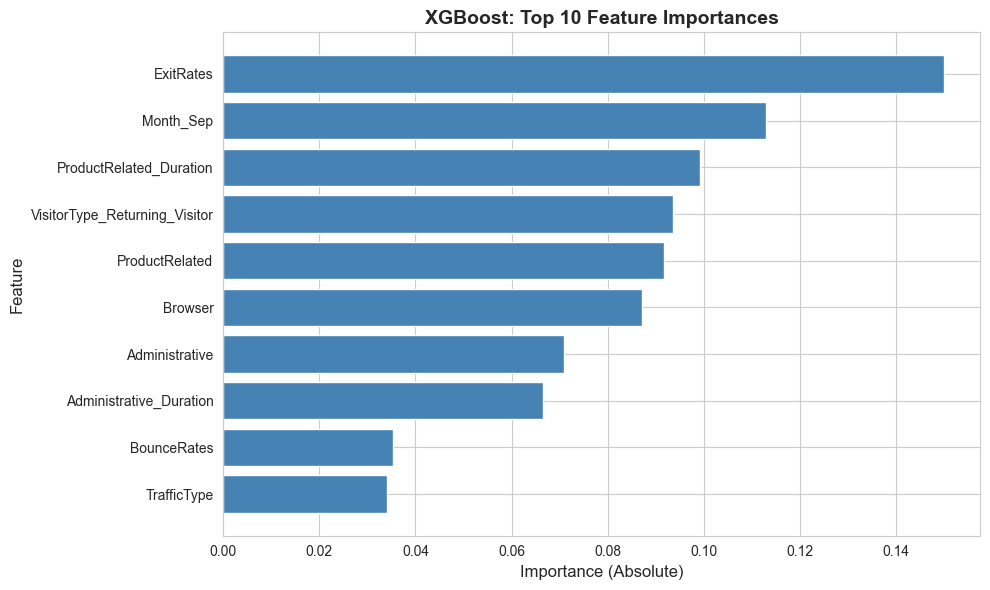

In [44]:
xgb_importance = best_xgb_model.named_steps['regressor'].feature_importances_

# Create DataFrame and get top 10
imp_df = pd.DataFrame({
    'feature': all_feature_names,
    'importance': xgb_importance
}).nlargest(10, 'importance')

# Plot
plt.figure(figsize=(10, 6))
plt.barh(imp_df['feature'], imp_df['importance'], color='steelblue')
plt.title('XGBoost: Top 10 Feature Importances', fontsize=14, fontweight='bold')
plt.xlabel('Importance (Absolute)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

By comparing the feature–importance plots of Ridge Regression and XGBoost, we observe several consistent and distinct patterns across the two models:

- **Shared key features**:  
  Both models highlight **ExitRates** and **VisitorType** as highly influential, indicating that browsing–exit behavior and visitor identity play central roles in shaping PageValues. Seasonal effects (e.g., **Month\_*** variables) also appear in both models.

- **Differences between linear and nonlinear models**:  
  Ridge Regression assigns notable weight to **BounceRates**, reflecting linear relationships captured through coefficients.  
  XGBoost, on the other hand, identifies additional important predictors—including **ProductRelated_Duration**, **ProductRelated**, **Region**, and **TrafficType**—which suggests that its nonlinear structure can detect interaction effects and complex patterns that linear models cannot represent.

Overall, the comparison demonstrates that while both models capture core behavioral drivers, XGBoost uncovers a wider set of influential features due to its ability to model nonlinear effects.

## 4.5 Interpretation of Regression Results

### 4.5.1 Nonlinear Models Perform Better Than Linear Models

XGBoost achieves a substantially higher R² (**0.1051**) compared with Ridge Regression (**0.0461**).  
This performance gap indicates that the relationship between users’ browsing behaviors, background attributes, and *PageValues* is **nonlinear in nature**.

The improvements in MAE and RMSE for XGBoost further support the conclusion that **tree-based nonlinear methods capture user behavior patterns more effectively** than linear models.

---

### 4.5.2 Low R² Is Expected and Does Not Indicate Model Failure

Both models obtain R² values below **0.11**, showing that predicting exact PageValues is challenging with the available features.

However, the low R² **does not invalidate the analysis**:

- The models still help identify **which features have stronger or weaker influence**.
- The task offers **meaningful insight** into how user engagement relates to PageValues.

Thus, the main value of this regression task lies in understanding **drivers of PageValues**, not in achieving high predictive precision.

---

### 4.5.3 Consistency in Key Feature Signals Across Models

Despite different modeling approaches, both Ridge Regression and XGBoost highlight a consistent set of important variables:

- **ExitRates**
- **VisitorType-related features**
- **Seasonal indicators (Month_*)**

This agreement across models increases confidence in the identified behavioral drivers, even when R² is low.

---

Overall, the regression analysis reveals **what drives PageValues**, even though precise prediction remains difficult.  
Both models successfully identify behavioral and contextual factors that influence value creation, giving us **actionable insights** into which aspects of user behavior contribute most to revenue potential.

## 4.6 Comparison of Regression Models and Future Directions

## 4.6.1 Model Comparison

### Model Structure
- **Ridge Regression**  
  Linear model with L2 regularization; highly interpretable but limited to linear patterns.

- **XGBoost Regressor**  
  Nonlinear tree-based model; captures complex relationships but requires more tuning.

### Predictive Performance
- **Ridge Regression:** CV R² = **0.0461**  
- **XGBoost:** CV R² = **0.1051** (significantly better)

XGBoost consistently shows higher predictive accuracy, confirming that PageValues depend on nonlinear behavioral patterns.

### Interpretability
- **Ridge:** Most interpretable (coefficient analysis).  
- **XGBoost:** Moderately interpretable (feature importance).  

### Practical Recommendation

| Model | Strengths | Best Use Case |
|-------|-----------|----------------|
| **Ridge Regression** | Simple, clear interpretation | When transparency is required |
| **XGBoost** | Best predictive accuracy | When performance is priority |


## 4.6.2 Future Work
- Explore more advanced models (e.g., neural networks).  
- Engineer richer behavioral or temporal features.  
- Collect additional user-level information to reduce sparsity.  
- Consider two-stage models for zero-inflated targets.

---

# 5. Unsupervised Learning
## 5.0 Overview

In this section, we apply unsupervised learning techniques to uncover hidden behavioral
patterns in the Online Shoppers Purchasing Intention Dataset. Since the target variable
(Revenue) is removed before training, the goal is to explore natural customer segments based
solely on browsing behavior.

We perform:

- PCA for dimensionality reduction and structure analysis

- K-Means clustering

- Gaussian Mixture Models (GMM) clustering

- Cluster interpretation and comparison

## 5.1 Data Preprocessing


We load the dataset, separate the target label (Revenue) for later interpretation, and retain
all remaining behavioral features as inputs to unsupervised learning.

In [45]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 

In [46]:

dataset = fetch_ucirepo(id=468)
# Load dataset
df = pd.concat([dataset.data.features, dataset.data.targets], axis=1) 

# Preview the first few rows
df.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [47]:
# Inspect dataset structure
df.info()

# Separate features (X) and target label (y)
X = df.drop(columns=["Revenue"])   # Used for unsupervised learning
y = df["Revenue"]                  # Kept only for later interpretation


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

### 5.1.2 Encoding & Standardization

Categorical features are one-hot encoded, and numerical features are standardized using a
ColumnTransformer, producing a purely numerical matrix suitable for PCA and clustering.

In [48]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Numeric features
numeric_features = [
    "Administrative",
    "Administrative_Duration",
    "Informational",
    "Informational_Duration",
    "ProductRelated",
    "ProductRelated_Duration",
    "BounceRates",
    "ExitRates",
    "PageValues",
    "SpecialDay",
]

# Categorical features
categorical_features = [
    "OperatingSystems",
    "Browser",
    "Region",
    "TrafficType",
    "Month",
    "VisitorType",
    "Weekend",
]

# Preprocessing: scale numeric features, one-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_features),
    ]
)

# Fit the preprocessor and transform X
X_processed = preprocessor.fit_transform(X)

X_processed.shape


(12330, 68)

## 5.2 Principal Component Analysis (PCA)
### 5.2.1 Explained Variance Analysis

We fit PCA on the encoded dataset and examine the explained variance ratios to determine
how many principal components capture most of the information.

In [49]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Fit PCA on the processed feature matrix (retain all components)
pca_full = PCA()
X_pca_full = pca_full.fit_transform(
    X_processed.toarray() if hasattr(X_processed, "toarray") else X_processed
)

# Explained variance ratio for each principal component
explained_var = pca_full.explained_variance_ratio_

# Inspect the first 10 components
explained_var[:10]


array([0.26080297, 0.12896448, 0.08415904, 0.07743007, 0.07411908,
       0.07184263, 0.03222944, 0.02726296, 0.02464703, 0.02147687])

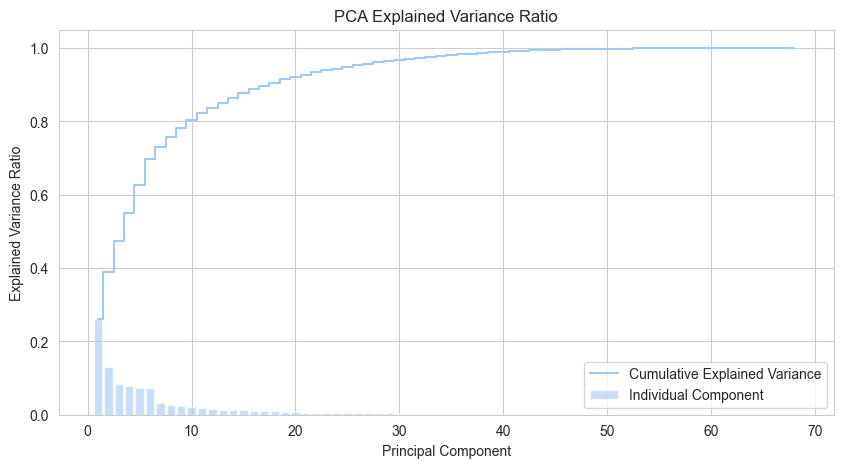

In [50]:
# Plot individual and cumulative explained variance
plt.figure(figsize=(10, 5))

# Individual component variance
plt.bar(
    range(1, len(explained_var) + 1),
    explained_var,
    alpha=0.6,
    label="Individual Component",
)

# Cumulative variance
plt.step(
    range(1, len(explained_var) + 1),
    np.cumsum(explained_var),
    where="mid",
    label="Cumulative Explained Variance",
)

plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("PCA Explained Variance Ratio")
plt.legend()
plt.show()


### 5.2.2 PCA 2D Projection

We project the dataset into 2D using **the first two principal components** to visualize the
structure of the data.

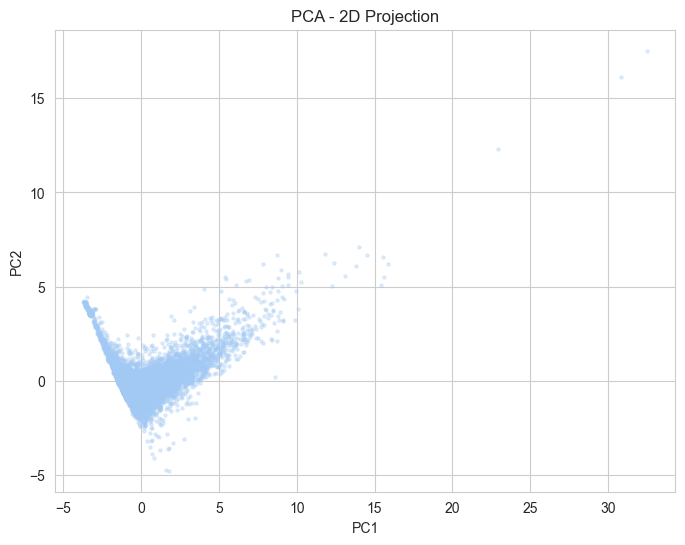

In [51]:
# Project data onto the first two principal components for visualization
pca_2 = PCA(n_components=2)
X_pca_2d = pca_2.fit_transform(
    X_processed.toarray() if hasattr(X_processed, "toarray") else X_processed
)

# 2D scatter plot of PCA projection
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], s=5, alpha=0.3)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA - 2D Projection")
plt.show()


### 5.2.3 PCA Feature Contributions (Loadings)

We examine PCA loadings to identify which features contribute the most to PC1 and PC2.
This reveals which types of user behavior drive the main axes of variation.

/var/folders/y5/g09pg4pj4nngwz1g9_pnvtz40000gn/T/ipykernel_4158/1733716300.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/y5/g09pg4pj4nngwz1g9_pnvtz40000gn/T/ipykernel_4158/1733716300.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


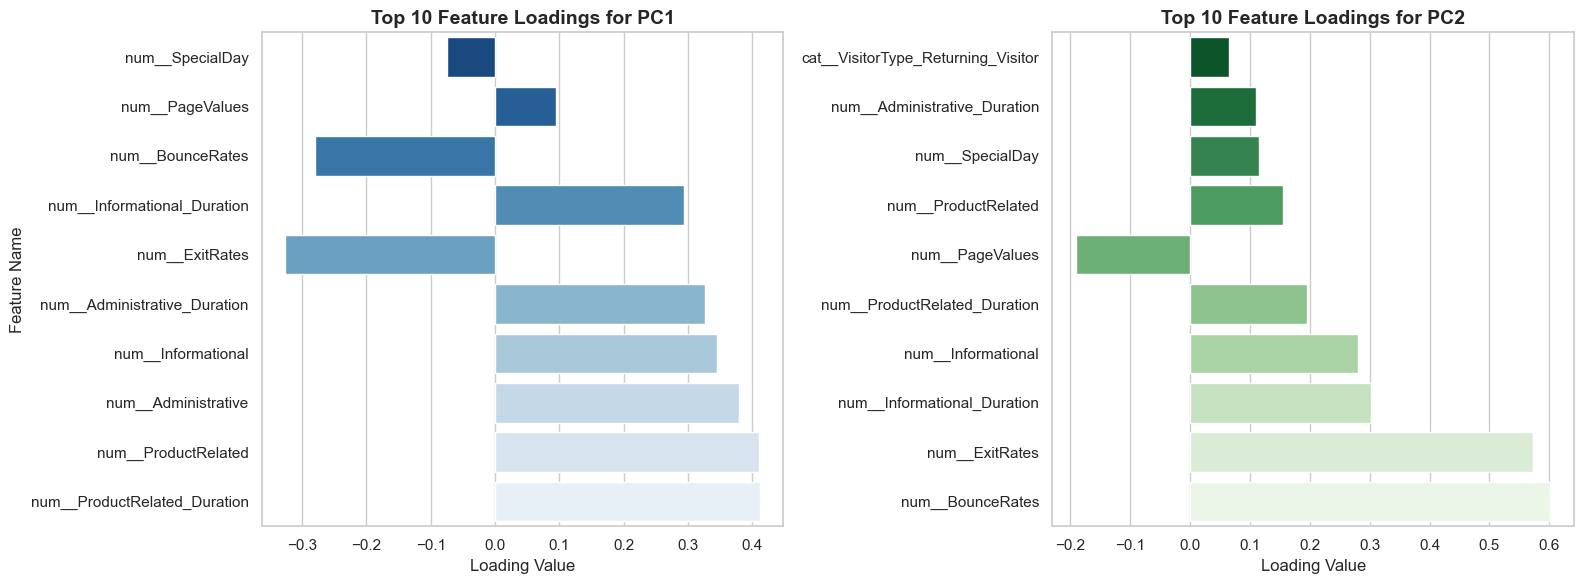

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# ===== 1. Prepare loading dataframe =====
feature_names = preprocessor.get_feature_names_out()
loadings = pca_full.components_  # shape: (n_components, n_features)

loading_df = pd.DataFrame(
    loadings[:2].T,                 # take PC1 & PC2
    index=feature_names,
    columns=["PC1", "PC2"],
)

# ===== 2. Find top |loadings| for PC1 and PC2 =====
topN = 10
top_pc1 = loading_df["PC1"].abs().sort_values(ascending=False).head(topN).index
top_pc2 = loading_df["PC2"].abs().sort_values(ascending=False).head(topN).index

df_pc1 = loading_df.loc[top_pc1].sort_values(by="PC1", key=abs)
df_pc2 = loading_df.loc[top_pc2].sort_values(by="PC2", key=abs)

# ===== 3. Plot loading bar charts =====
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- PC1 plot ---
sns.barplot(
    x=df_pc1["PC1"], 
    y=df_pc1.index,
    ax=axes[0],
    palette="Blues_r"
)
axes[0].set_title("Top 10 Feature Loadings for PC1", fontsize=14, weight='bold')
axes[0].set_xlabel("Loading Value")
axes[0].set_ylabel("Feature Name")

# --- PC2 plot ---
sns.barplot(
    x=df_pc2["PC2"], 
    y=df_pc2.index,
    ax=axes[1],
    palette="Greens_r"
)
axes[1].set_title("Top 10 Feature Loadings for PC2", fontsize=14, weight='bold')
axes[1].set_xlabel("Loading Value")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()


## 5.3 Clustering Analysis

Before clustering, we reduce dimensionality to the first 10 principal components, capturing
most of the variance while improving clustering efficiency and stability.

In [53]:
from sklearn.decomposition import PCA

# Use the first 10 principal components as input for clustering
pca_n = PCA(n_components=10)
X_pca_n = pca_n.fit_transform(
    X_processed.toarray() if hasattr(X_processed, "toarray") else X_processed
)

X_pca_n.shape


(12330, 10)

### 5.3.1 Determining the Optimal Number of Clusters
- Elbow Method

    We evaluate KMeans inertia values across different values of k to identify the elbow point.

- Silhouette Analysis

    We compute silhouette scores for k = 2 to 10 to determine the best-separated clustering structure.

We find that k = 3 yields the highest silhouette score.

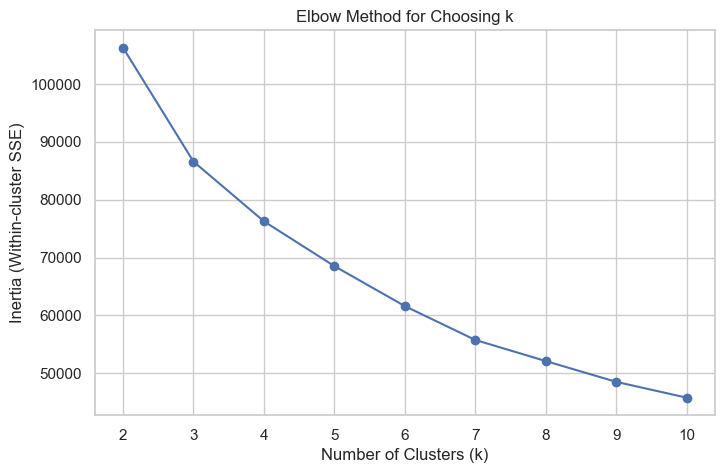

In [54]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca_n)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-cluster SSE)")
plt.title("Elbow Method for Choosing k")
plt.show()


k = 2, silhouette score = 0.4068
k = 3, silhouette score = 0.4122
k = 4, silhouette score = 0.3913
k = 5, silhouette score = 0.3498
k = 6, silhouette score = 0.3554
k = 7, silhouette score = 0.3554
k = 8, silhouette score = 0.3561
k = 9, silhouette score = 0.2969
k = 10, silhouette score = 0.2912


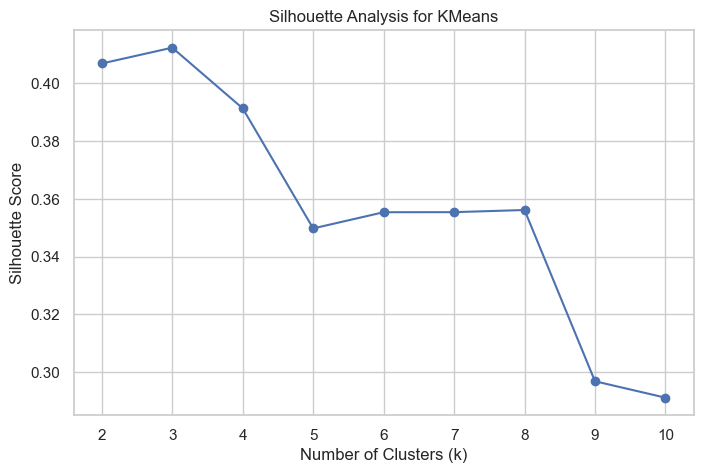

In [55]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_pca_n)
    score = silhouette_score(X_pca_n, labels)
    silhouette_scores.append(score)
    print(f"k = {k}, silhouette score = {score:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for KMeans")
plt.show()


### 5.3.2 K-Means Clustering (k = 3)
- Model Fitting

    We train a KMeans model with k=3 and obtain cluster assignments.

- Visualization in PCA Space

    Clusters are visualized using **the first two** PCA components.

- Cluster Profiles

    We compute feature means for each cluster to interpret behavioral patterns.

In [56]:
from sklearn.cluster import KMeans
import numpy as np

# Train the final KMeans model using the selected k = 3
k_opt = 3
kmeans_final = KMeans(n_clusters=k_opt, random_state=42, n_init=10)

cluster_labels = kmeans_final.fit_predict(X_pca_n)

# Cluster size summary
unique, counts = np.unique(cluster_labels, return_counts=True)
dict(zip(unique, counts))


{0: 1055, 1: 1620, 2: 9655}

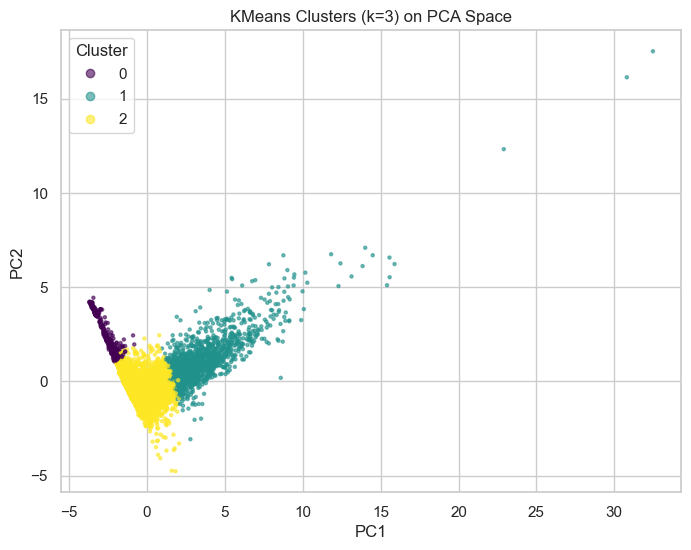

In [57]:
import matplotlib.pyplot as plt

# Extract the first two PCA components for visualization
pc1 = X_pca_n[:, 0]
pc2 = X_pca_n[:, 1]

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    pc1,
    pc2,
    c=cluster_labels,
    cmap="viridis",
    s=5,
    alpha=0.6,
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("KMeans Clusters (k=3) on PCA Space")
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()


In [58]:
# Add KMeans cluster labels back to the original dataframe
df_with_cluster = df.copy()
df_with_cluster["Cluster"] = cluster_labels

# Compute mean values of numeric features for each cluster
# (Revenue is binary, so its mean represents purchase probability)
cluster_profile = df_with_cluster.groupby("Cluster").mean(numeric_only=True)

cluster_profile


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Cluster,,,,,,,,,,,,,,,,
0,0.048341,1.412196,0.015166,0.086445,3.084360,57.814104,0.166068,0.180170,0.000000,0.108626,2.177251,2.317536,3.061611,4.978199,0.168720,0.005687
1,7.372840,308.088192,2.524074,213.284061,97.021605,3845.004738,0.006256,0.019385,9.755956,0.029506,2.114198,2.238889,2.967284,3.645062,0.256173,0.280864
2,1.714241,51.362064,0.217918,8.227166,23.906784,874.295115,0.009144,0.032067,5.883988,0.061626,2.119834,2.381253,3.186950,4.041533,0.235629,0.149871


### 5.3.3 Gaussian Mixture Model (GMM)
- Model Selection via AIC / BIC

    We compare AIC and BIC values for different numbers of components (k = 2–10).

- Final GMM Model (k = 6)

    We fit a GMM with 6 components and examine the distribution of samples across clusters.

- Visualization in PCA Space

    We plot the soft clusters using PC1 and PC2.

- Cluster Profiles

    We compute mean numeric values per GMM cluster.

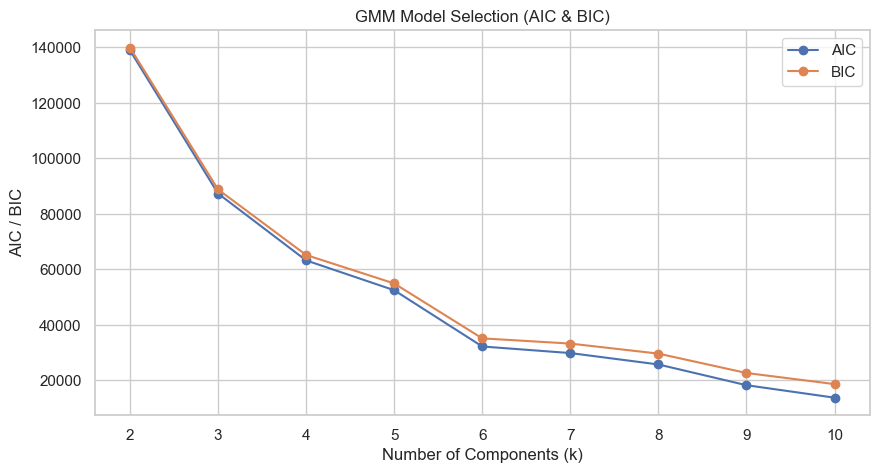

In [59]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

K_range = range(2, 11)

gmm_aic = []
gmm_bic = []

for k in K_range:
    gmm = GaussianMixture(
        n_components=k,
        covariance_type="full",
        random_state=42,
    )
    gmm.fit(X_pca_n)
    gmm_aic.append(gmm.aic(X_pca_n))
    gmm_bic.append(gmm.bic(X_pca_n))

plt.figure(figsize=(10, 5))
plt.plot(K_range, gmm_aic, marker="o", label="AIC")
plt.plot(K_range, gmm_bic, marker="o", label="BIC")
plt.xlabel("Number of Components (k)")
plt.ylabel("AIC / BIC")
plt.title("GMM Model Selection (AIC & BIC)")
plt.legend()
plt.show()


In [60]:
from sklearn.mixture import GaussianMixture
import numpy as np

k_gmm = 6

# Fit the final GMM model with k = 6 components
gmm = GaussianMixture(
    n_components=k_gmm,
    covariance_type="full",
    random_state=42,
)

gmm_labels = gmm.fit_predict(X_pca_n)

# Cluster size summary for GMM
unique_gmm, counts_gmm = np.unique(gmm_labels, return_counts=True)
dict(zip(unique_gmm, counts_gmm))


{0: 1686, 1: 4022, 2: 3315, 3: 808, 4: 1638, 5: 861}

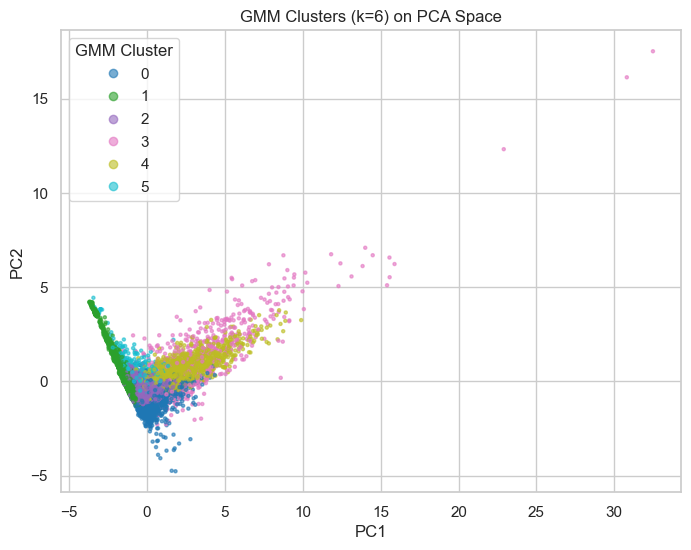

In [61]:
import matplotlib.pyplot as plt

pc1 = X_pca_n[:, 0]
pc2 = X_pca_n[:, 1]

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    pc1,
    pc2,
    c=gmm_labels,
    cmap="tab10",
    s=5,
    alpha=0.6,
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("GMM Clusters (k=6) on PCA Space")
plt.legend(*scatter.legend_elements(), title="GMM Cluster")
plt.show()


In [62]:
# Add GMM cluster labels back to the original dataframe
df_gmm = df.copy()
df_gmm["GMM_Cluster"] = gmm_labels

# Compute mean values of numeric features for each GMM cluster
# (Revenue is binary, so its mean represents purchase probability)
gmm_profile = df_gmm.groupby("GMM_Cluster").mean(numeric_only=True)

gmm_profile


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
GMM_Cluster,,,,,,,,,,,,,,,,
0,3.533215,152.748427,0.000000,0.000000,31.877224,1225.325649,0.005012,0.019454,28.715844,0.000000,2.111507,2.466785,3.231910,3.880190,0.240807,0.558719
1,0.000000,0.000000,0.000000,0.000000,9.128543,259.397816,0.051285,0.081214,0.000427,0.098508,2.126305,2.364744,3.116609,4.326952,0.194928,0.011934
2,2.451885,58.445987,0.000000,0.000000,28.430166,1041.065811,0.006988,0.024846,0.009496,0.000000,2.140271,2.362293,3.228356,4.014480,0.255204,0.055807
3,5.623762,348.078015,2.459158,309.289460,70.176980,3056.376886,0.008264,0.022469,21.347399,0.174257,2.097772,2.298267,2.956683,4.081683,0.228960,0.381188
4,5.157509,142.456551,2.137973,101.799486,75.387668,2862.791008,0.006551,0.020850,4.221263,0.000000,2.114164,2.229548,3.073871,3.606227,0.272894,0.236264
5,1.706156,35.563653,0.836237,9.745905,30.609756,1175.477905,0.021289,0.042941,0.003846,0.255981,2.118467,2.384437,3.132404,4.320557,0.232288,0.044135


## 5.4 Cluster Interpretation

To understand the behavioral meaning of the clusters discovered by KMeans and GMM, we
analyze the average values of key numeric features within each cluster. Since `Revenue` is a
binary variable (0 = no purchase, 1 = purchase), its mean directly represents the purchase
probability of each cluster.

### 5.4.1 Interpretation of KMeans Clusters (k = 3)

The KMeans model creates three clear behavioral segments:

#### **Cluster 0 — Medium-engagement regular visitors**
- Moderate number of page views and browsing durations  
- Average bounce and exit rates  
- Low purchase probability  
- Represents typical browsing sessions without strong purchasing intent

#### **Cluster 1 — Low-engagement quick visitors**
- Very few pages visited, minimal time spent  
- High bounce and exit rates  
- Near-zero purchase probability  
- Represents accidental or low-intent visits

#### **Cluster 2 — High-engagement potential buyers**
- Highest values in ProductRelated and ProductRelated_Duration  
- High PageValues  
- Significantly higher purchase probability  
- Represents users actively exploring products and likely to convert

KMeans reveals a clean segmentation into **low-, medium-, and high-engagement** visitor groups.

---

### 5.4.2 Interpretation of GMM Clusters (k = 6)

The GMM model produces six softer, more granular behavioral subgroups:

#### **Cluster 0 — Moderate browsing but low conversions**
- Medium page views  
- Short product viewing duration  
- Low purchase probability  

#### **Cluster 1 — High-engagement buyers**
- Very high ProductRelated and duration metrics  
- Highest PageValues among all clusters  
- Strongest purchase probability  

#### **Cluster 2 — Zero-duration visits**
- Zero Administrative/Informational/ProductRelated durations  
- Represents extremely quick visits (likely immediate exit)  
- Very low engagement and minimal purchase likelihood  

#### **Cluster 3 — Extremely high-depth product explorers**
- Very long ProductRelated and Informational durations  
- Highest browsing intensity among all six clusters  
- High conversion probability  

#### **Cluster 4 — Light product viewers**
- Some product exploration but limited duration  
- Low PageValues  
- Low-to-medium purchase probability  

#### **Cluster 5 — High-engagement return visitors**
- High ProductRelated metrics  
- High PageValues  
- Frequent repeat visits (higher Weekend/TrafficType patterns)  
- Elevated purchase probability  

GMM captures **more nuanced substructures** than KMeans, distinguishing between different
types of high-engagement and low-engagement users instead of grouping them into a single
cluster.

---

### 5.4.3 Key Behavioral Insights

Across both clustering methods, several consistent patterns emerge:

- **High product-related engagement strongly correlates with purchases.**  
- **Bounce and exit rates are reliable indicators of low purchase intent.**  
- **Visitors cluster naturally into low-, medium-, and high-engagement groups, with GMM revealing additional subtypes.**
- **High PageValues clusters consistently show higher conversion.**

These behavioral distinctions can guide:
- targeted marketing strategies,  
- personalized product recommendations,  
- user segmentation for remarketing campaigns.

Overall, unsupervised learning uncovers clear behavioral structures that complement the
supervised analysis by revealing *why* certain users are more likely to convert.


## 5.5 Comparison of Clustering Methods

We compare the performance and characteristics of KMeans and GMM based on cluster
structure, interpretability, flexibility, and model selection metrics.

### 5.5.1 Structural Differences

**KMeans**
- Produces hard assignments (each sample belongs to exactly one cluster)
- Assumes spherical clusters with equal variance
- Tends to create similarly sized clusters
- Performs best when clusters are well-separated in feature space

**GMM**
- Produces soft assignments (probabilistic membership)
- Models clusters as Gaussian distributions with flexible covariance structures
- Able to capture elongated, overlapping, or irregularly shaped clusters
- More expressive and better suited for complex behavioral patterns

---

### 5.5.2 Model Selection and Fit Quality

**KMeans**
- Evaluation based on inertia (SSE) and silhouette scores  
- Silhouette analysis shows **k = 3** provides the best separation  
- Provides a clean high-level segmentation (low / medium / high engagement)

**GMM**
- Selected using statistical criteria (AIC / BIC)  
- AIC/BIC curves indicate **k = 6** as the optimal number of components  
- Captures more nuanced subgroups beyond the coarse KMeans structure

---

### 5.5.3 Interpretability

- **KMeans is easier to interpret**, producing simple and intuitive behavioral segments.  
- **GMM is more detailed but less intuitive**, generating finer-grained distinctions that may
require more domain expertise to interpret.

---

### 5.5.4 Practical Recommendation

| Method | Strengths | Limitations | Best Use Case |
|--------|-----------|-------------|----------------|
| **KMeans** | Fast, simple, intuitive; strong baseline | Assumes equal-variance spherical clusters | High-level segmentation (3–5 groups) |
| **GMM** | Flexible shapes; probabilistic assignments; captures complex structure | Computationally heavier; risk of overfitting | Detailed behavioral profiling (5+ subgroups) |

---

### 5.5.5 Summary

Overall:
- **KMeans** reveals the dominant three customer types in the dataset  
- **GMM** uncovers finer substructures within those broad groups  
- Both methods consistently show that product-related engagement strongly predicts purchase
behavior

Using both models together provides a more complete understanding of customer behavior,
balancing interpretability with structural flexibility.


---

# 6. Conclusion and Recommendation
## 6.1 Insights from Unsupervised Learning
Based on the clustering results from K-Means and GMM, we identify several meaningful behavioral segments:

- **Low-engagement quick visitors**: very short sessions, high bounce/exit rates, minimal intent to purchase.
- **Medium-engagement regular visitors**: moderate browsing behavior with limited conversion likelihood.
- **High-engagement potential buyers**: high interaction with ProductRelated pages, long viewing durations, and strong purchase signals.

These clusters reveal distinct visitor types and help explain how different users engage with the website.

---

## 6.2 Insights from Classification Models
By applying Logistic Regression, Random Forest, and FCNN, the following conclusions can be drawn:

- **Nonlinear models show superior performance**:  
  Random Forest (Test Accuracy ≈ **0.904**) and FCNN (≈ **0.894**) outperform Logistic Regression (**0.886**), especially in identifying buyers (Revenue = 1).

- **Different models serve different purposes**:  
  - **Random Forest** → Best overall accuracy and interpretability  
  - **FCNN** → Highest recall for buyers (useful when missing potential customers is costly)  
  - **Logistic Regression** → Clear and interpretable baseline  

These models enable the prediction of which visitors are likely to make purchases, supporting targeted marketing and decision-making.

---

## 6.3 Insights from Regression Models (Predicting PageValues)
For PageValues prediction using Ridge Regression and XGBoost:

- **Nonlinear modeling performs better**:  
  XGBoost (R² ≈ **0.105**) is notably stronger than Ridge Regression (R² ≈ **0.046**).

- **Low R² is expected**:  
  PageValues is sparse and highly skewed, making precise numeric prediction inherently difficult.  
  Low R² does *not* invalidate the insights.

- **Feature importance is consistent across models**:  
  Key behavioral drivers repeatedly include:  
  - **ExitRates**  
  - **VisitorType**  
  - **Seasonal features (Month_*)**  

Thus, while exact prediction is challenging, regression helps reveal the factors most associated with high PageValues.

---

## 6.4 Recommendations

### 6.4.1 Improve Targeting with Behavioral Segmentation
Use the discovered clusters to guide marketing strategies:

- Prioritize **high-engagement potential buyers** in remarketing and promotions.  
- Reduce unnecessary spending on extremely low-engagement or accidental visitors.


### 6.4.2 Optimize Buyer Identification Strategies
Based on model performance:

- Use **Random Forest** as the default model for balanced and accurate predictions.
- Use **FCNN** when maximizing recall for buyers is the primary objective.
- Apply Logistic Regression when interpretability is more important than performance.



### 6.4.3 Enhance PageValues Prediction and Interpretation
Although PageValues is difficult to predict precisely, the analysis identifies:

- Key behavioral signals (ExitRates, browsing durations, VisitorType)
- Seasonal patterns in user value
- Strong relationships between product-related browsing and PageValues

These findings can guide improvements in **UI design**, **content placement**, and **recommendation strategies**.



### 6.4.4 Future Work
To further enhance model capability and business value:

- **Engineer richer behavioral features** (time-series patterns, dwell-time curves, scrolling behavior).
- **Explore advanced models** (LSTM, Transformers, CatBoost, LightGBM).
- **Reduce label sparsity** by converting PageValues into tiers or predicting high-value probability.
- **Incorporate external context** such as marketing campaigns, seasonal activity, or traffic source quality.

---